# LUAD, LUSC, Healthy

In [57]:
# dropping the samples that did not predict correctly
def drop_false_pred(df):
    #df = df[df.predicted_label == df.true_label].copy()
    df = df[df.predicted_label.astype(int) == df.true_label.astype(int)].copy()
    df.drop(["predicted_label","true_label"], axis=1, inplace=True),
    return df


In [58]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
import matplotlib.pylab as pl
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

import pandas as pd
import pickle
from tqdm import tqdm


import statistics 
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


# print the JS visualization code to the notebook
shap.initjs()

In [59]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
import matplotlib.pylab as pl
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

import pandas as pd
import pickle
from tqdm import tqdm


import statistics 
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import math
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
# from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dropout, Dense
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import RMSprop
import pandas as pd
import numpy as np
import pickle

from keras import backend as K
from keras.models import model_from_json
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from tqdm import tqdm

import numpy as np
import pandas as pd

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




# print the JS visualization code to the notebook
shap.initjs()

In [5]:
pd.read_csv("../Data/luad_lusc_healthy/train_split_"+str(i)+".csv")

,HIST3H2A,LIN7B,LXN,CNKSR2,SCML1,AC024592.12,GSDMD,AKR1C1,C3orf62,CRISPLD2,...,ZNF521,SPINT2,HAVCR2,RP1-66C13.4,C3orf79,CTD-2116N17.1,FUT2,label,Sample,Sample_2
0,44.89,172.65,414.87,7.75,50.63,62.12,1605.83,65990.84,126.12,563.18,...,66.18,27553.49,258.57,0.0,0.0,1.35,246.28,luad,TCGA-91-6849-01A,TCGA-91-6849
1,41.52,166.73,1030.12,26.47,138.10,25.35,1721.16,256.78,123.50,583.07,...,104.42,26614.89,536.45,0.0,0.0,9.63,206.94,luad,TCGA-91-6835-01A,TCGA-91-6835
2,34.02,111.99,186.40,1.39,281.09,36.53,575.03,29124.60,63.45,759.08,...,21.47,8421.31,72.01,0.0,0.0,30.56,75.64,luad,TCGA-55-7570-01A,TCGA-55-7570
3,127.00,206.94,366.09,13.12,60.39,15.80,2004.85,136.19,76.17,297.17,...,95.34,18431.96,148.09,0.0,0.0,0.00,285.03,luad,TCGA-55-6981-01A,TCGA-55-6981
4,1208.34,295.11,236.21,22.43,41.81,33.78,4704.07,483.38,88.88,1008.90,...,40.36,9474.59,108.14,0.0,0.0,7.51,493.56,luad,TCGA-55-8616-01A,TCGA-55-8616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,358.54,79.45,629.35,42.71,460.44,9.93,2777.33,1407.55,106.63,3540.14,...,69.03,10296.45,3955.48,0.0,0.0,0.82,41.81,healthy,GTEX-144GO-0226-,GTEX-144GO-0
767,6.78,23.76,271.48,48.52,73.54,9.70,1487.87,27553.49,108.90,1651.00,...,46.18,10084.54,563.18,0.0,0.0,1.97,18.43,healthy,GTEX-OHPM-0526-S,GTEX-OHPM-05
768,18.84,138.10,403.50,110.43,262.20,35.00,1127.35,5913.33,190.34,1059.11,...,107.38,6561.36,108.14,0.0,0.0,1.28,3.82,healthy,GTEX-13OVG-0326-,GTEX-13OVG-0
769,105.15,117.60,2915.45,10.63,102.97,26.67,2367.90,669.92,143.01,420.68,...,69.03,9409.14,2627.46,0.0,0.0,10.63,368.65,healthy,GTEX-WYVS-0526-S,GTEX-WYVS-05


In [9]:
#XGBoost

model_dir= "../models/luad_lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # xgboost definition
    xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=3,
                    random_state=42)
    #fitting model
    mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
    # save to JSON
    mcl.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_xgboost.json")
    # prediction output
    pred = mcl.predict(X_test)
    # probability of predicted output
    proba = mcl.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_xgboost.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc_healthy/true_predicted_label_test_"+str(i)+"_xgboost.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)


(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:49:20] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:50:28] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9326, Precision: 0.9324, Recall: 0.9326, F1 Score: 0.9322
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:51:36] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9741, Precision: 0.9743, Recall: 0.9741, F1 Score: 0.9739
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:52:43] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9689
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:53:51] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9740, Precision: 0.9742, Recall: 0.9740, F1 Score: 0.9739
Average Accuracy: 0.9637
Average Precision: 0.9639
Average Recall: 0.9637
Average F1 Score: 0.9636
Combined Confusion Matrix:
[[313   0   0]
 [  3 340  13]
 [  2  17 276]]


Random State: 10
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:25:55] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:27:04] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9378, Precision: 0.9378, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:28:14] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9689, Precision: 0.9692, Recall: 0.9689, F1 Score: 0.9687
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:29:24] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:30:35] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9688, Precision: 0.9687, Recall: 0.9688, F1 Score: 0.9687
Random State 10 - Average Accuracy: 0.9606
Random State 10 - Average Precision: 0.9607
Random State 10 - Average Recall: 0.9606
Random State 10 - Average F1 Score: 0.9605
Random State 10 - Combined Confusion Matrix:
[[313   0   0]
 [  3 340  13]
 [  2  20 273]]


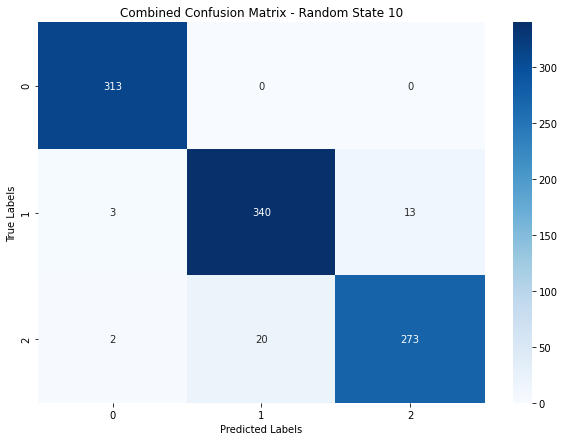

Random State: 20
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:31:46] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:32:55] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9430, Precision: 0.9434, Recall: 0.9430, F1 Score: 0.9427
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:34:04] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9689, Precision: 0.9692, Recall: 0.9689, F1 Score: 0.9687
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:35:16] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:36:24] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9635, Precision: 0.9634, Recall: 0.9635, F1 Score: 0.9634
Random State 20 - Average Accuracy: 0.9606
Random State 20 - Average Precision: 0.9608
Random State 20 - Average Recall: 0.9606
Random State 20 - Average F1 Score: 0.9604
Random State 20 - Combined Confusion Matrix:
[[313   0   0]
 [  3 341  12]
 [  3  20 272]]


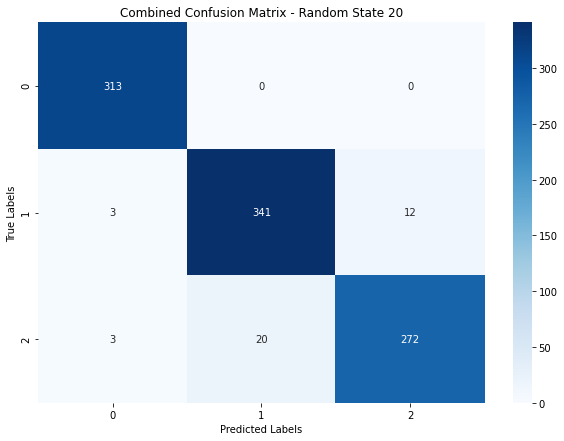

Random State: 30
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:37:33] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:38:43] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9378, Precision: 0.9380, Recall: 0.9378, F1 Score: 0.9374
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:39:53] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9741, Precision: 0.9743, Recall: 0.9741, F1 Score: 0.9739
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:41:02] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9534, Precision: 0.9534, Recall: 0.9534, F1 Score: 0.9533
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:42:10] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9688, Precision: 0.9687, Recall: 0.9688, F1 Score: 0.9687
Random State 30 - Average Accuracy: 0.9616
Random State 30 - Average Precision: 0.9617
Random State 30 - Average Recall: 0.9616
Random State 30 - Average F1 Score: 0.9615
Random State 30 - Combined Confusion Matrix:
[[313   0   0]
 [  3 341  12]
 [  2  20 273]]


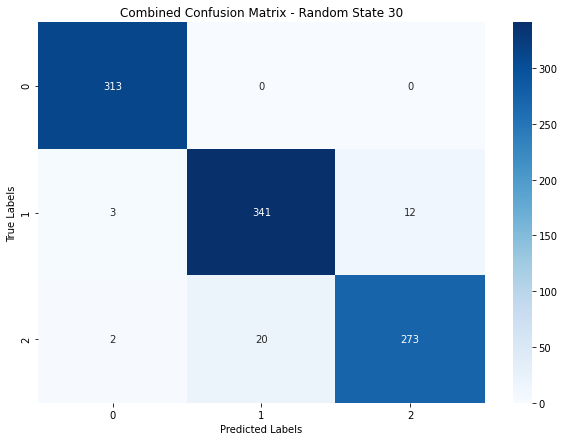

Random State: 40
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:43:21] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:44:30] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9378, Precision: 0.9378, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:45:40] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9689, Precision: 0.9692, Recall: 0.9689, F1 Score: 0.9687
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:46:50] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9689, Precision: 0.9689, Recall: 0.9689, F1 Score: 0.9689
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:47:59] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9740, Precision: 0.9742, Recall: 0.9740, F1 Score: 0.9739
Random State 40 - Average Accuracy: 0.9637
Random State 40 - Average Precision: 0.9639
Random State 40 - Average Recall: 0.9637
Random State 40 - Average F1 Score: 0.9636
Random State 40 - Combined Confusion Matrix:
[[313   0   0]
 [  3 341  12]
 [  2  18 275]]


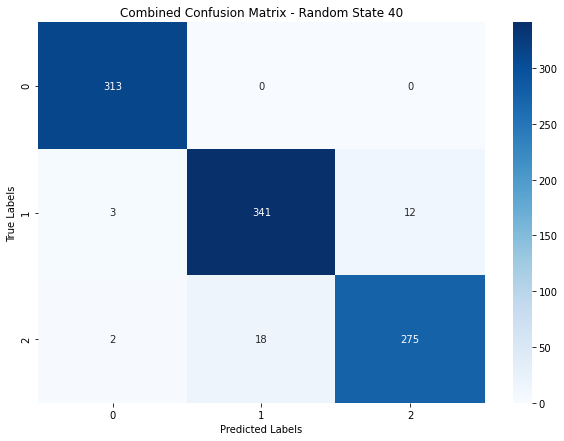

Random State: 50
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:49:08] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:50:18] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9378, Precision: 0.9378, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:51:28] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9741, Precision: 0.9743, Recall: 0.9741, F1 Score: 0.9739
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:52:37] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:53:46] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9635, Precision: 0.9634, Recall: 0.9635, F1 Score: 0.9634
Random State 50 - Average Accuracy: 0.9616
Random State 50 - Average Precision: 0.9617
Random State 50 - Average Recall: 0.9616
Random State 50 - Average F1 Score: 0.9615
Random State 50 - Combined Confusion Matrix:
[[313   0   0]
 [  2 341  13]
 [  3  19 273]]


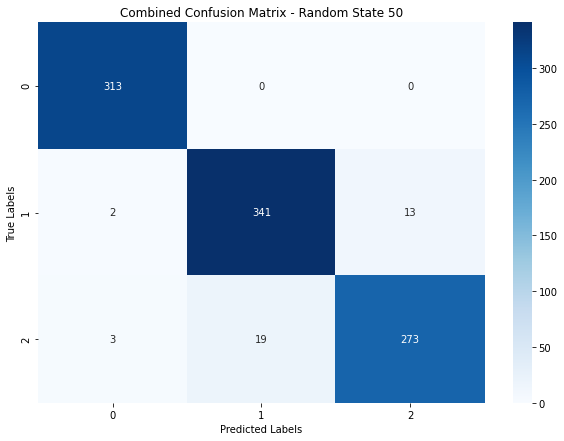

Random State: 60
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:54:55] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9585, Precision: 0.9598, Recall: 0.9585, F1 Score: 0.9583
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:56:04] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9430, Precision: 0.9434, Recall: 0.9430, F1 Score: 0.9427
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:57:14] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9637, Precision: 0.9638, Recall: 0.9637, F1 Score: 0.9635
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:58:22] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:59:31] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9635, Precision: 0.9634, Recall: 0.9635, F1 Score: 0.9634
Random State 60 - Average Accuracy: 0.9575
Random State 60 - Average Precision: 0.9578
Random State 60 - Average Recall: 0.9575
Random State 60 - Average F1 Score: 0.9573
Random State 60 - Combined Confusion Matrix:
[[313   0   0]
 [  2 341  13]
 [  2  24 269]]


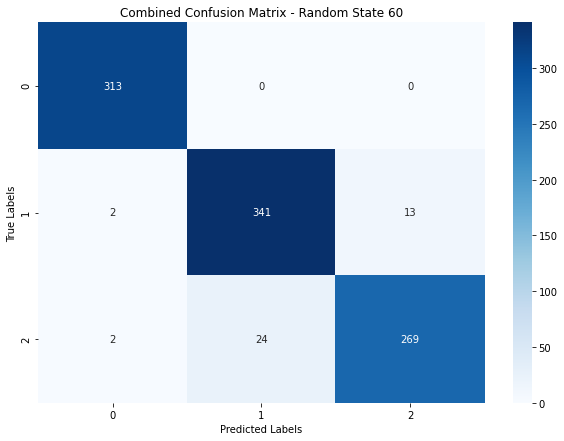

Random State: 70
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:00:40] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:01:50] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:03:01] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9689, Precision: 0.9692, Recall: 0.9689, F1 Score: 0.9687
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:04:10] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9584
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:05:19] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9688, Precision: 0.9687, Recall: 0.9688, F1 Score: 0.9687
Random State 70 - Average Accuracy: 0.9616
Random State 70 - Average Precision: 0.9616
Random State 70 - Average Recall: 0.9616
Random State 70 - Average F1 Score: 0.9615
Random State 70 - Combined Confusion Matrix:
[[313   0   0]
 [  5 338  13]
 [  2  17 276]]


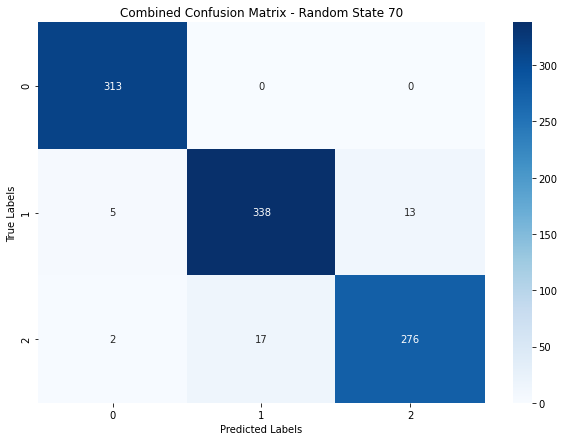

Random State: 80
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:06:28] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:07:38] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9378, Precision: 0.9380, Recall: 0.9378, F1 Score: 0.9374
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:08:47] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9637, Precision: 0.9642, Recall: 0.9637, F1 Score: 0.9635
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:09:57] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:11:05] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9688, Precision: 0.9687, Recall: 0.9688, F1 Score: 0.9687
Random State 80 - Average Accuracy: 0.9596
Random State 80 - Average Precision: 0.9598
Random State 80 - Average Recall: 0.9596
Random State 80 - Average F1 Score: 0.9594
Random State 80 - Combined Confusion Matrix:
[[313   0   0]
 [  4 340  12]
 [  2  21 272]]


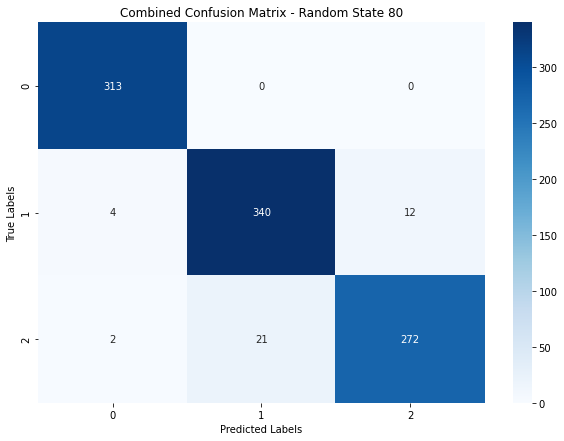

Random State: 90
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:12:15] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:13:24] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:14:34] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9689, Precision: 0.9688, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:15:43] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9637, Precision: 0.9638, Recall: 0.9637, F1 Score: 0.9637
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:16:53] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 90 - Average Accuracy: 0.9616
Random State 90 - Average Precision: 0.9616
Random State 90 - Average Recall: 0.9616
Random State 90 - Average F1 Score: 0.9615
Random State 90 - Combined Confusion Matrix:
[[313   0   0]
 [  3 340  13]
 [  3  18 274]]


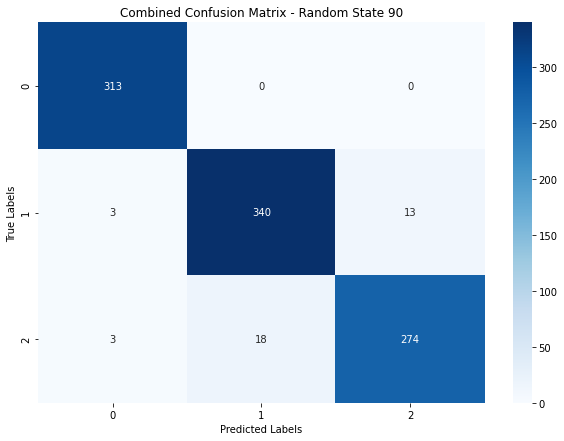

Random State: 100
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:18:01] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:19:11] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9378, Precision: 0.9378, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:20:22] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9741, Precision: 0.9743, Recall: 0.9741, F1 Score: 0.9739
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:21:31] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9637, Precision: 0.9639, Recall: 0.9637, F1 Score: 0.9638
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:22:39] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 100 - Average Accuracy: 0.9627
Random State 100 - Average Precision: 0.9628
Random State 100 - Average Recall: 0.9627
Random State 100 - Average F1 Score: 0.9625
Random State 100 - Combined Confusion Matrix:
[[313   0   0]
 [  2 341  13]
 [  3  18 274]]


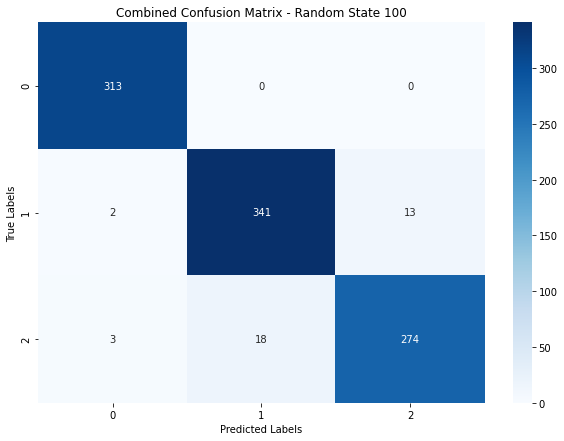

In [63]:
# inclusion of many random states; xgboost; no hp

model_dir = "../models/luad_lusc_healthy/"

# Lists to store the scores for each random state
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for random_state in random_states:
    print(f"Random State: {random_state}")

    # Lists to store the scores for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Lists to accumulate true and predicted labels for all folds
    all_true_labels = []
    all_pred_labels = []

    for i in range(1, 6):
        newdftrain = pd.read_csv("../Data/luad_lusc_healthy/train_split_" + str(i) + ".csv")
        newdftrain.index = newdftrain["Sample"]
        newdftest = pd.read_csv("../Data/luad_lusc_healthy/test_split_" + str(i) + ".csv")
        newdftest.index = newdftest["Sample"]
        X_train, y_train = newdftrain.iloc[:, 0:19648], newdftrain['label'].values
        X_test, y_test = newdftest.iloc[:, 0:19648], newdftest['label'].values
        print(X_train.shape, y_train.shape)
        print(X_test.shape, y_test.shape)

        # XGBoost definition with varying random state
            # xgboost definition
        xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=3,
                    random_state= random_state)
        # Fitting model
        mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
        # Save to JSON
        mcl.save_model(model_dir + f"fold_" + str(i) + f"_model_topology_xgboost_hp_random_state_{random_state}.json")
        # Prediction output
        pred = mcl.predict(X_test)
        # Probability of predicted output
        proba = mcl.predict_proba(X_test)

        # Append true and predicted labels
        all_true_labels.extend(y_test)
        all_pred_labels.extend(pred)

        # Calculate metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='weighted')
        recall = recall_score(y_test, pred, average='weighted')
        f1 = f1_score(y_test, pred, average='weighted')

        # Append scores to the lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print scores for the current fold
        print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        # Store labels for results
        y_map = pd.DataFrame(data=y_test, columns=['class'])
        y_map['pred'] = pred
        y_map['true_label'] = y_map['class'].map({'healthy': 0, 'luad': 1, 'lusc': 2})
        y_map['pred_label'] = y_map['pred'].map({'healthy': 0, 'luad': 1, 'lusc': 2})
        y_map.index = X_test.index

        # Adding true and predicted label to X_test
        X_test['true_label'] = y_map['true_label']
        X_test['predicted_label'] = y_map['pred_label']

        # Drop false predictions
        X_test = drop_false_pred(X_test)
        X_test.to_csv(f"../Output/luad_lusc_healthy/AfterDroppingFalsePrediction_test_{i}_xgboost_hp_random_state_{random_state}.csv")

        # New y_map
        y_map_new = y_map[y_map.index.isin(X_test.index.tolist())]
        y_map_new.to_csv(f"../Output/luad_lusc_healthy/true_predicted_label_test_{i}_xgboost_hp_random_state_{random_state}.csv")

    # Calculate average scores
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print average scores
    print(f"Random State {random_state} - Average Accuracy: {avg_accuracy:.4f}")
    print(f"Random State {random_state} - Average Precision: {avg_precision:.4f}")
    print(f"Random State {random_state} - Average Recall: {avg_recall:.4f}")
    print(f"Random State {random_state} - Average F1 Score: {avg_f1:.4f}")

    # Calculate combined confusion matrix
    combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
    print(f"Random State {random_state} - Combined Confusion Matrix:")
    print(combined_cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Combined Confusion Matrix - Random State {random_state}')
    plt.show()

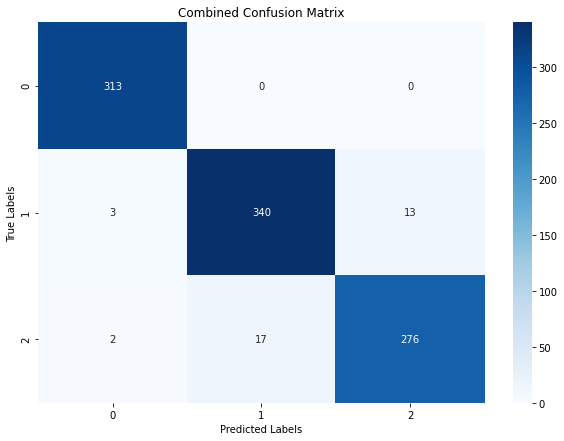

In [10]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

In [42]:
# CNN
# convert to 2D model function

def convert_2d(df):
    np_array = df.values
    # pixel length
    pixel_length = math.ceil(math.sqrt(df.shape[1]))
    print(pixel_length)
    
    #padding
    pad_length = pixel_length ** 2 - df.shape[1]
    print(pad_length)
    
    np_array_padded = np.pad(np_array, ((0, 0), (0, pad_length)), mode="constant")
    print(np_array_padded)
    
    #reshaping
    np_array_2d = np.reshape(
        np_array_padded, (np_array_padded.shape[0], pixel_length, pixel_length)
    )
    print(np_array_2d.shape)
    np_array_2d_1 = np.expand_dims(np_array_2d, axis=3)
    print(np_array_2d_1.shape)
    return np_array_2d_1

#one hot encoding for labels

def convert_onehot(df_labels):
    np_labels = np.array(df_labels)
    print(np_labels)
    encoder = LabelBinarizer()
    print(encoder)
    np_labels_onehot = encoder.fit_transform(np_labels)
    return np_labels_onehot


# best model
# round 5
# CNN model

def keras_cnn(X, y, loss_func="categorical_crossentropy"):
    model = Sequential()

    model.add(
        Conv2D(32, (3, 3), input_shape=(X.shape[1], X.shape[2], 1), padding="same")
    )
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    

    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))

    model.add(Conv2D(256, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.2))

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))

    model.add(Dense(y.shape[1]))
    model.add(Activation("softmax"))

    model.compile(
        loss=loss_func,
#         optimizer=RMSprop(lr=0.01, rho=0.9, decay=0.01),
        optimizer=RMSprop(lr=0.01,decay=0.02),
        metrics=["accuracy"],
    )

    return model

# dropping the samples that did not predict correctly
def drop_false_pred(df):
    #df = df[df.predicted_label == df.true_label].copy()
    df = df[df.predicted_label.astype(int) == df.true_label.astype(int)].copy()
    df.drop(["predicted_label","true_label"], axis=1, inplace=True),
    return df

model_dir= "../models/luad_lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []


for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
    #     newdftrain=newdftrain.drop(["Unnamed: 0"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    
    # CNN model
    X_train_converted = convert_2d(X_train)
    # print(X_train_converted.shape)
    
    y_train_converted = convert_onehot(y_train)
    # print(y_train_converted.shape)
    
    model = keras_cnn(X_train_converted, y_train_converted)
    print("Model Initiated. Run_"+ str(i))
    
    # Train model beautifully
    model.fit(
        X_train_converted, 
        y_train_converted, 
        batch_size=32, 
        epochs=30,
        #epochs=2,
        verbose=1,
        validation_split=0.2, 
    ) 
    
    from keras.models import model_from_json

    # Save model JSON and weights
#     model_dir="../model/"
    model_json = model.to_json()
    with open(model_dir+"CNN_model_bestModel_test_"+str(i)+"_CNN.json", "w") as json_file:
        json_file.write(model_json)

    model.save_weights(model_dir+"CNN_model_bestModel_model_weights_test_"+str(i)+".hdf5")
    
    # X test values
    X_test_copy= X_test
    X_test = convert_2d(X_test)
    lb = LabelBinarizer()
    lb.fit(y_test)
    
    
    # Run predictions and add everything to a giant DataFrame
#     y_preds = model.predict_classes(
#         X_test
#     )
    y_preds= np.argmax(model.predict(X_test),axis=1)
    num_preds = len(y_preds)
    #print(num_preds)

    #classes = df["target"].unique()
    classes = np.unique(y_test)
    num_classes = len(classes)
    #print(num_classes)
    
    #true label and pred label mapping
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= y_preds
    y_map['pred']=y_map['pred'].map({0: 'healthy',1: 'luad',2:'lusc'})
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test_copy.index
    
    
    # adding true and predicted label to X_test
    X_test_copy['true_label']= y_map['true_label']
    X_test_copy['predicted_label']= y_map['pred_label']

    # drop false prediction
    X_test_copy=drop_false_pred(X_test_copy)
#     X_test_copy.to_csv("../Output/Output_CNN/CNN_AfterDroppingFalsePrediction_test_"+str(i)+".csv")
                       
    # new y_map
    #y_map_new= pd.DataFrame()
    y_map_new= y_map[y_map.index.isin(X_test_copy.index.tolist())]
#     y_map_new.to_csv("../Output/Output_CNN/CNN_true_predicted_label_test_"+str(i)+".csv")

    # F1 score and accuracy
    y_preds_onehot = np.zeros([num_preds, num_classes])
    y_preds_onehot[np.arange(num_preds), y_preds] = 1
    y_preds_labels = lb.inverse_transform(y_preds_onehot)

    print(f"macro-average F1 : {f1_score(y_test, y_preds_labels, average='macro')}")
    conf_mat = confusion_matrix(y_preds_labels, y_test)
    acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
    print('Overall accuracy: {} %'.format(acc*100))

                       
                       

(771, 19648) (771,)
(193, 19648) (193,)
141
233
[[  44.89  172.65  414.87 ...    0.      0.      0.  ]
 [  41.52  166.73 1030.12 ...    0.      0.      0.  ]
 [  34.02  111.99  186.4  ...    0.      0.      0.  ]
 ...
 [  18.84  138.1   403.5  ...    0.      0.      0.  ]
 [ 105.15  117.6  2915.45 ...    0.      0.      0.  ]
 [ 148.09  108.14  503.95 ...    0.      0.      0.  ]]
(771, 141, 141)
(771, 141, 141, 1)
['luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad

The `lr` argument is deprecated, use `learning_rate` instead.


Model Initiated. Run_1
Epoch 1/30
20/20 [==============================] - 4s 138ms/step - loss: 0.8450 - accuracy: 0.7565 - val_loss: 20826.2637 - val_accuracy: 0.9935
Epoch 2/30
20/20 [==============================] - 2s 124ms/step - loss: 0.2692 - accuracy: 0.9221 - val_loss: 11164.2998 - val_accuracy: 0.7548
Epoch 3/30
20/20 [==============================] - 2s 124ms/step - loss: 0.1728 - accuracy: 0.9399 - val_loss: 1.0820e-05 - val_accuracy: 1.0000
Epoch 4/30
20/20 [==============================] - 2s 124ms/step - loss: 0.1199 - accuracy: 0.9545 - val_loss: 493.4387 - val_accuracy: 0.8710
Epoch 5/30
20/20 [==============================] - 2s 124ms/step - loss: 0.1174 - accuracy: 0.9643 - val_loss: 0.3424 - val_accuracy: 0.8516
Epoch 6/30
20/20 [==============================] - 2s 124ms/step - loss: 0.0947 - accuracy: 0.9627 - val_loss: 92.4789 - val_accuracy: 0.7871
Epoch 7/30
20/20 [==============================] - 2s 124ms/step - loss: 0.0493 - accuracy: 0.9773 - val_loss

Model Initiated. Run_2
Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


20/20 [==============================] - 4s 137ms/step - loss: 0.7016 - accuracy: 0.7321 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
20/20 [==============================] - 2s 124ms/step - loss: 0.3048 - accuracy: 0.9156 - val_loss: 950.5254 - val_accuracy: 0.5871
Epoch 3/30
20/20 [==============================] - 2s 123ms/step - loss: 0.1536 - accuracy: 0.9529 - val_loss: 0.8693 - val_accuracy: 0.6839
Epoch 4/30
20/20 [==============================] - 2s 123ms/step - loss: 0.1976 - accuracy: 0.9399 - val_loss: 0.1945 - val_accuracy: 0.9419
Epoch 5/30
20/20 [==============================] - 2s 123ms/step - loss: 0.0875 - accuracy: 0.9805 - val_loss: 0.9337 - val_accuracy: 0.6129
Epoch 6/30
20/20 [==============================] - 2s 124ms/step - loss: 0.0915 - accuracy: 0.9773 - val_loss: 1102.4421 - val_accuracy: 0.0194
Epoch 7/30
20/20 [==============================] - 2s 124ms/step - loss: 0.0519 - accuracy: 0.9789 - val_loss: 5.7074 - val_accuracy: 0.0581
Epoch 8/

The `lr` argument is deprecated, use `learning_rate` instead.


Model Initiated. Run_3
Epoch 1/30
20/20 [==============================] - 4s 139ms/step - loss: 0.8105 - accuracy: 0.7646 - val_loss: 1.6552 - val_accuracy: 0.9935
Epoch 2/30
20/20 [==============================] - 2s 123ms/step - loss: 0.3130 - accuracy: 0.9091 - val_loss: 0.4876 - val_accuracy: 0.9935
Epoch 3/30
20/20 [==============================] - 2s 123ms/step - loss: 0.1825 - accuracy: 0.9448 - val_loss: 1.8458e-08 - val_accuracy: 1.0000
Epoch 4/30
20/20 [==============================] - 2s 124ms/step - loss: 0.1940 - accuracy: 0.9351 - val_loss: 0.1756 - val_accuracy: 0.9613
Epoch 5/30
20/20 [==============================] - 2s 123ms/step - loss: 0.1130 - accuracy: 0.9627 - val_loss: 0.5815 - val_accuracy: 0.9677
Epoch 6/30
20/20 [==============================] - 2s 123ms/step - loss: 0.0590 - accuracy: 0.9773 - val_loss: 0.1969 - val_accuracy: 0.9742
Epoch 7/30
20/20 [==============================] - 2s 123ms/step - loss: 0.0318 - accuracy: 0.9903 - val_loss: 0.3102 - 

The `lr` argument is deprecated, use `learning_rate` instead.


Model Initiated. Run_4
Epoch 1/30
20/20 [==============================] - 5s 138ms/step - loss: 0.6582 - accuracy: 0.7744 - val_loss: 4.8159 - val_accuracy: 0.9935
Epoch 2/30
20/20 [==============================] - 2s 123ms/step - loss: 0.2711 - accuracy: 0.9253 - val_loss: 1.3477 - val_accuracy: 0.9935
Epoch 3/30
20/20 [==============================] - 2s 124ms/step - loss: 0.1555 - accuracy: 0.9513 - val_loss: 2.1429 - val_accuracy: 0.9935
Epoch 4/30
20/20 [==============================] - 2s 124ms/step - loss: 0.2071 - accuracy: 0.9448 - val_loss: 3.4392 - val_accuracy: 0.9677
Epoch 5/30
20/20 [==============================] - 2s 124ms/step - loss: 0.1160 - accuracy: 0.9659 - val_loss: 0.9902 - val_accuracy: 0.9871
Epoch 6/30
20/20 [==============================] - 2s 124ms/step - loss: 0.0593 - accuracy: 0.9838 - val_loss: 0.7273 - val_accuracy: 0.9935
Epoch 7/30
20/20 [==============================] - 2s 124ms/step - loss: 0.0763 - accuracy: 0.9708 - val_loss: 0.6140 - val_

The `lr` argument is deprecated, use `learning_rate` instead.


Epoch 1/30
20/20 [==============================] - 5s 159ms/step - loss: 0.8356 - accuracy: 0.7261 - val_loss: 22.1854 - val_accuracy: 0.9871
Epoch 2/30
20/20 [==============================] - 2s 123ms/step - loss: 0.2632 - accuracy: 0.9222 - val_loss: 5.7356 - val_accuracy: 0.9871
Epoch 3/30
20/20 [==============================] - 2s 124ms/step - loss: 0.1406 - accuracy: 0.9498 - val_loss: 2.3613 - val_accuracy: 0.7677
Epoch 4/30
20/20 [==============================] - 2s 124ms/step - loss: 0.1044 - accuracy: 0.9643 - val_loss: 1052.3512 - val_accuracy: 0.8968
Epoch 5/30
20/20 [==============================] - 2s 124ms/step - loss: 0.0809 - accuracy: 0.9708 - val_loss: 1.8585 - val_accuracy: 0.8903
Epoch 6/30
20/20 [==============================] - 2s 124ms/step - loss: 0.0580 - accuracy: 0.9838 - val_loss: 34.9674 - val_accuracy: 0.6129
Epoch 7/30
20/20 [==============================] - 2s 124ms/step - loss: 0.0694 - accuracy: 0.9773 - val_loss: 725.1990 - val_accuracy: 0.9290

(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Average Accuracy: 0.9616
Average Precision: 0.9617
Average Recall: 0.9616
Average F1 Score: 0.9615
Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


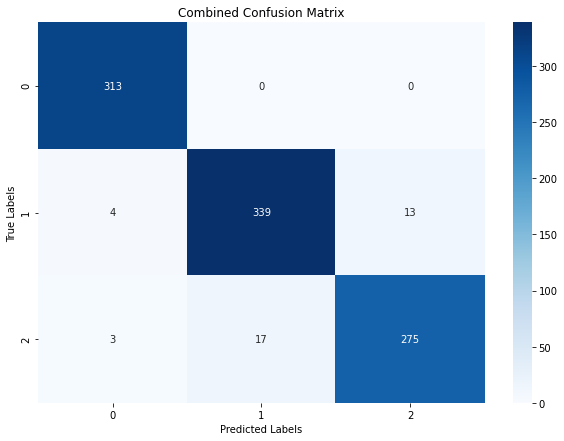

In [21]:
#XGBoost no HP

model_dir= "../models/luad_lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # xgboost definition
    xgbc = xgb.XGBClassifier(random_state=42)
    #fitting model
    mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
    # save to JSON
    mcl.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_xgboost_nohp.json")
    # prediction output
    pred = mcl.predict(X_test)
    # probability of predicted output
    proba = mcl.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_xgboost_nohp.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc_healthy/true_predicted_label_test_"+str(i)+"_xgboost_nohp.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()


Random State: 10
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 10 - Average Accuracy: 0.9616
Random State 10 - Average Precision: 0.9617
Random State 10 - Average Recall: 0.9616
Random State 10 - Average F1 Score: 0.9615
Random State 10 - Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


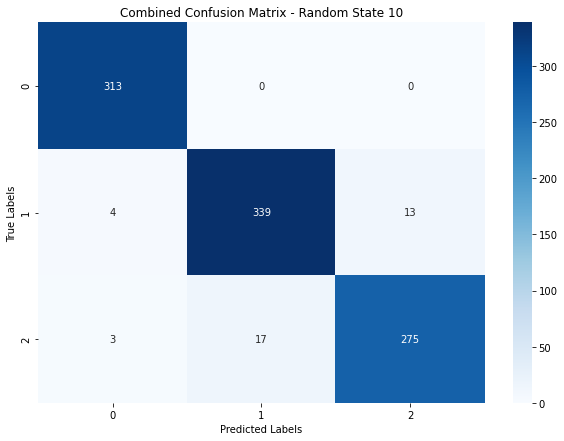

Random State: 20
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 20 - Average Accuracy: 0.9616
Random State 20 - Average Precision: 0.9617
Random State 20 - Average Recall: 0.9616
Random State 20 - Average F1 Score: 0.9615
Random State 20 - Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


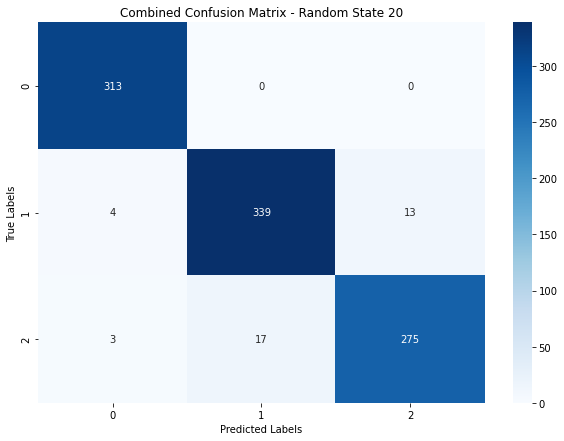

Random State: 30
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 30 - Average Accuracy: 0.9616
Random State 30 - Average Precision: 0.9617
Random State 30 - Average Recall: 0.9616
Random State 30 - Average F1 Score: 0.9615
Random State 30 - Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


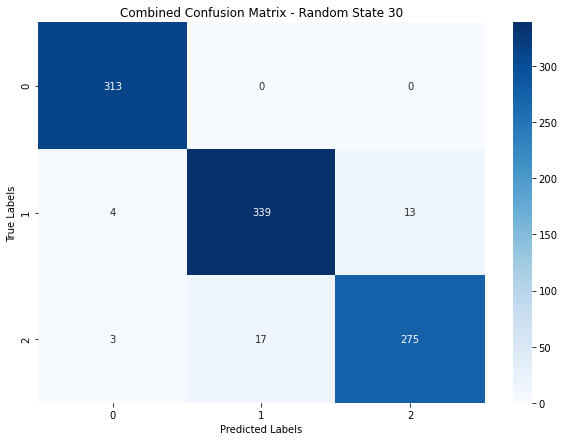

Random State: 40
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 40 - Average Accuracy: 0.9616
Random State 40 - Average Precision: 0.9617
Random State 40 - Average Recall: 0.9616
Random State 40 - Average F1 Score: 0.9615
Random State 40 - Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


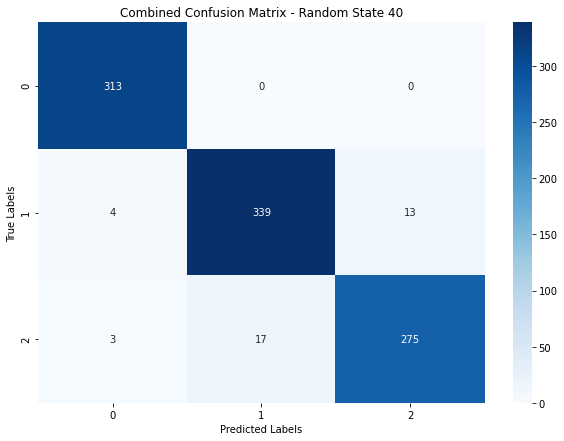

Random State: 50
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 50 - Average Accuracy: 0.9616
Random State 50 - Average Precision: 0.9617
Random State 50 - Average Recall: 0.9616
Random State 50 - Average F1 Score: 0.9615
Random State 50 - Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


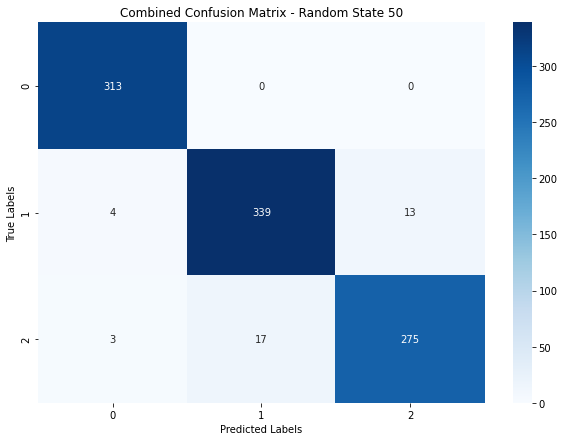

Random State: 60
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 60 - Average Accuracy: 0.9616
Random State 60 - Average Precision: 0.9617
Random State 60 - Average Recall: 0.9616
Random State 60 - Average F1 Score: 0.9615
Random State 60 - Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


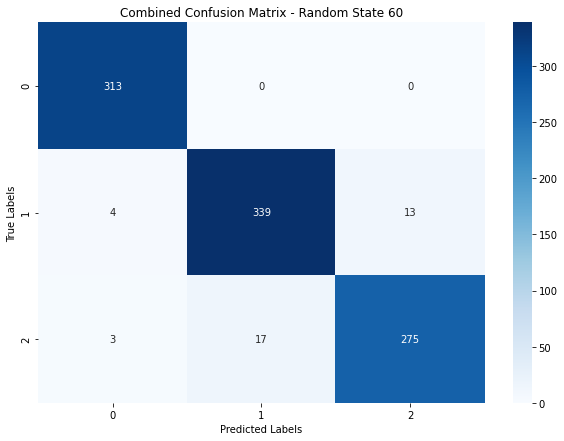

Random State: 70
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 70 - Average Accuracy: 0.9616
Random State 70 - Average Precision: 0.9617
Random State 70 - Average Recall: 0.9616
Random State 70 - Average F1 Score: 0.9615
Random State 70 - Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


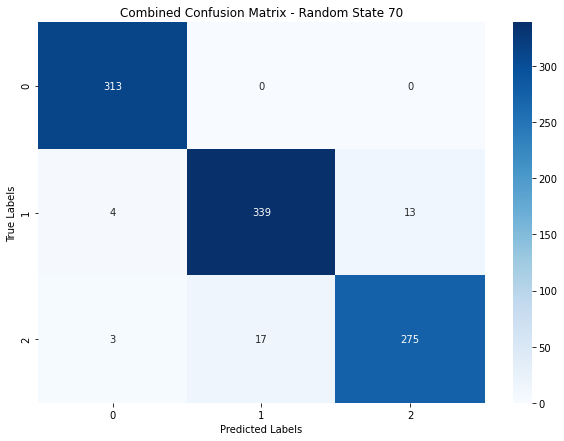

Random State: 80
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 80 - Average Accuracy: 0.9616
Random State 80 - Average Precision: 0.9617
Random State 80 - Average Recall: 0.9616
Random State 80 - Average F1 Score: 0.9615
Random State 80 - Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


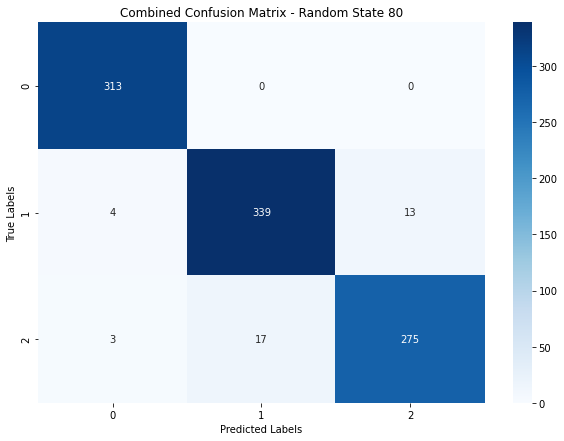

Random State: 90
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 90 - Average Accuracy: 0.9616
Random State 90 - Average Precision: 0.9617
Random State 90 - Average Recall: 0.9616
Random State 90 - Average F1 Score: 0.9615
Random State 90 - Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


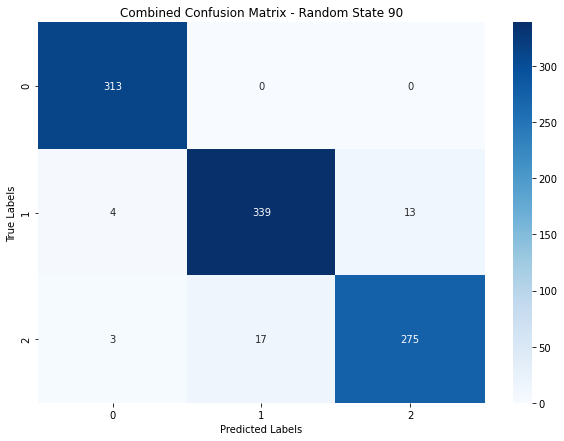

Random State: 100
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9689, Precision: 0.9693, Recall: 0.9689, F1 Score: 0.9688
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9741, Precision: 0.9742, Recall: 0.9741, F1 Score: 0.9740
(771, 19648) (771,)
(193, 19648) (193,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9585
(772, 19648) (772,)
(192, 19648) (192,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9688, Precision: 0.9689, Recall: 0.9688, F1 Score: 0.9687
Random State 100 - Average Accuracy: 0.9616
Random State 100 - Average Precision: 0.9617
Random State 100 - Average Recall: 0.9616
Random State 100 - Average F1 Score: 0.9615
Random State 100 - Combined Confusion Matrix:
[[313   0   0]
 [  4 339  13]
 [  3  17 275]]


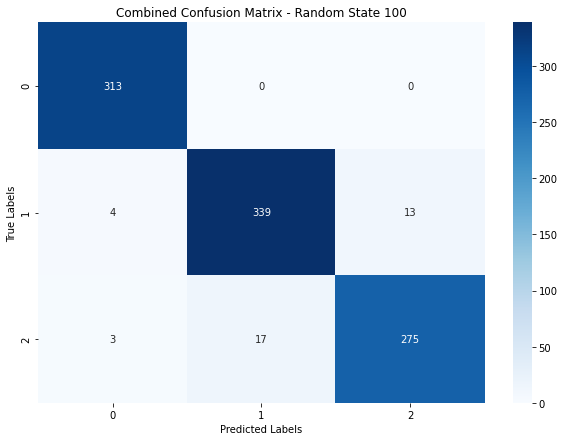

In [53]:
# inclusion of many random states; xgboost; no hp

model_dir = "../models/luad_lusc_healthy/"

# Lists to store the scores for each random state
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for random_state in random_states:
    print(f"Random State: {random_state}")

    # Lists to store the scores for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Lists to accumulate true and predicted labels for all folds
    all_true_labels = []
    all_pred_labels = []

    for i in range(1, 6):
        newdftrain = pd.read_csv("../Data/luad_lusc_healthy/train_split_" + str(i) + ".csv")
        newdftrain.index = newdftrain["Sample"]
        newdftest = pd.read_csv("../Data/luad_lusc_healthy/test_split_" + str(i) + ".csv")
        newdftest.index = newdftest["Sample"]
        X_train, y_train = newdftrain.iloc[:, 0:19648], newdftrain['label'].values
        X_test, y_test = newdftest.iloc[:, 0:19648], newdftest['label'].values
        print(X_train.shape, y_train.shape)
        print(X_test.shape, y_test.shape)

        # XGBoost definition with varying random state
        xgbc = xgb.XGBClassifier(random_state=random_state)
        # Fitting model
        mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
        # Save to JSON
        mcl.save_model(model_dir + f"fold_" + str(i) + f"_model_topology_xgboost_nohp_random_state_{random_state}.json")
        # Prediction output
        pred = mcl.predict(X_test)
        # Probability of predicted output
        proba = mcl.predict_proba(X_test)

        # Append true and predicted labels
        all_true_labels.extend(y_test)
        all_pred_labels.extend(pred)

        # Calculate metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='weighted')
        recall = recall_score(y_test, pred, average='weighted')
        f1 = f1_score(y_test, pred, average='weighted')

        # Append scores to the lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print scores for the current fold
        print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        # Store labels for results
        y_map = pd.DataFrame(data=y_test, columns=['class'])
        y_map['pred'] = pred
        y_map['true_label'] = y_map['class'].map({'healthy': 0, 'luad': 1, 'lusc': 2})
        y_map['pred_label'] = y_map['pred'].map({'healthy': 0, 'luad': 1, 'lusc': 2})
        y_map.index = X_test.index

        # Adding true and predicted label to X_test
        X_test['true_label'] = y_map['true_label']
        X_test['predicted_label'] = y_map['pred_label']

        # Drop false predictions
        X_test = drop_false_pred(X_test)
        X_test.to_csv(f"../Output/luad_lusc_healthy/AfterDroppingFalsePrediction_test_{i}_xgboost_nohp_random_state_{random_state}.csv")

        # New y_map
        y_map_new = y_map[y_map.index.isin(X_test.index.tolist())]
        y_map_new.to_csv(f"../Output/luad_lusc_healthy/true_predicted_label_test_{i}_xgboost_nohp_random_state_{random_state}.csv")

    # Calculate average scores
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print average scores
    print(f"Random State {random_state} - Average Accuracy: {avg_accuracy:.4f}")
    print(f"Random State {random_state} - Average Precision: {avg_precision:.4f}")
    print(f"Random State {random_state} - Average Recall: {avg_recall:.4f}")
    print(f"Random State {random_state} - Average F1 Score: {avg_f1:.4f}")

    # Calculate combined confusion matrix
    combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
    print(f"Random State {random_state} - Combined Confusion Matrix:")
    print(combined_cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Combined Confusion Matrix - Random State {random_state}')
    plt.show()

(771, 19648) (771,)
(193, 19648) (193,)
Fold 1 - Accuracy: 0.9585, Precision: 0.9598, Recall: 0.9585, F1 Score: 0.9583
(771, 19648) (771,)
(193, 19648) (193,)
Fold 2 - Accuracy: 0.9223, Precision: 0.9216, Recall: 0.9223, F1 Score: 0.9216
(771, 19648) (771,)
(193, 19648) (193,)
Fold 3 - Accuracy: 0.9534, Precision: 0.9536, Recall: 0.9534, F1 Score: 0.9530
(771, 19648) (771,)
(193, 19648) (193,)
Fold 4 - Accuracy: 0.9637, Precision: 0.9636, Recall: 0.9637, F1 Score: 0.9636
(772, 19648) (772,)
(192, 19648) (192,)
Fold 5 - Accuracy: 0.9583, Precision: 0.9582, Recall: 0.9583, F1 Score: 0.9581
Average Accuracy: 0.9513
Average Precision: 0.9513
Average Recall: 0.9513
Average F1 Score: 0.9509
Combined Confusion Matrix:
[[313   0   0]
 [  6 336  14]
 [  2  25 268]]


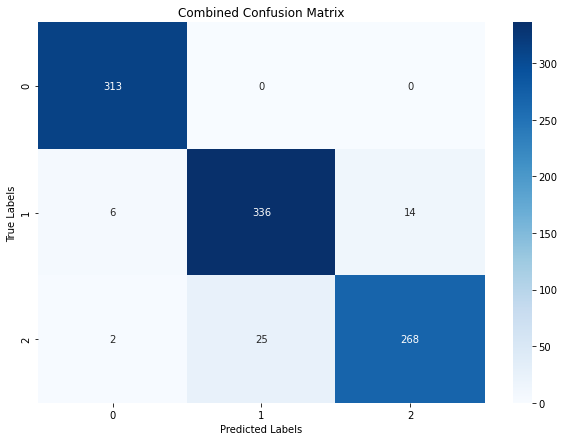

In [17]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# RF

model_dir= "../models/luad_lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Random Forest definition
    rf = RandomForestClassifier()
    # fitting model
    rf.fit(X_train, y_train)

    # Save the model
    joblib.dump(rf, model_dir + f"fold_" + str(i) + "_model_topology_rf.pkl")
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")
    # prediction output
    pred = rf.predict(X_test)
    # probability of predicted output
    proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_rf.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc_healthy/true_predicted_label_test_"+str(i)+"_rf.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(771, 19648) (771,)
(193, 19648) (193,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 1 - Accuracy: 0.3731, Precision: 0.1392, Recall: 0.3731, F1 Score: 0.2027
(771, 19648) (771,)
(193, 19648) (193,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 2 - Accuracy: 0.3679, Precision: 0.1353, Recall: 0.3679, F1 Score: 0.1979
(771, 19648) (771,)
(193, 19648) (193,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 3 - Accuracy: 0.3679, Precision: 0.1353, Recall: 0.3679, F1 Score: 0.1979
(771, 19648) (771,)
(193, 19648) (193,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 4 - Accuracy: 0.5596, Precision: 0.4939, Recall: 0.5596, F1 Score: 0.4717
(772, 19648) (772,)
(192, 19648) (192,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 5 - Accuracy: 0.3698, Precision: 0.1367, Recall: 0.3698, F1 Score: 0.1997
Average Accuracy: 0.4076
Average Precision: 0.2081
Average Recall: 0.4076
Average F1 Score: 0.2540
Combined Confusion Matrix:
[[ 37 276   0]
 [  0 356   0]
 [  0 295   0]]


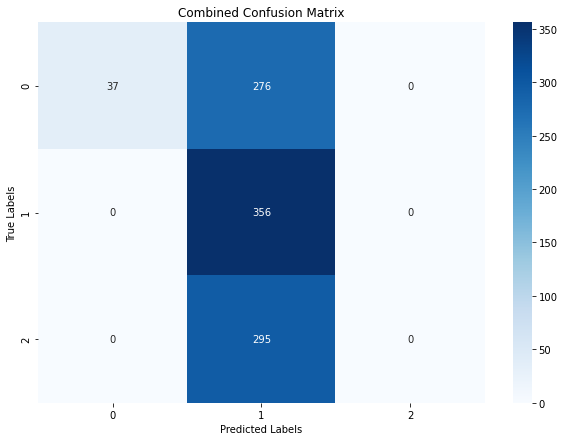

In [18]:
from sklearn.svm import SVC


model_dir= "../models/luad_lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # SVM definition with default hyperparameters
    svm = SVC(probability=True, random_state=42)
    # fitting model
    svm.fit(X_train, y_train)
    
    # prediction output
    pred = svm.predict(X_test)

    # Save the model
    joblib.dump(svm, model_dir + f"fold_" + str(i) + "_model_topology_svm.pkl")
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_svm.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc_healthy/true_predicted_label_test_"+str(i)+"_svm.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(771, 19648) (771,)
(193, 19648) (193,)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 1 - Accuracy: 0.9585, Precision: 0.9585, Recall: 0.9585, F1 Score: 0.9584
(771, 19648) (771,)
(193, 19648) (193,)


lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 2 - Accuracy: 0.9378, Precision: 0.9374, Recall: 0.9378, F1 Score: 0.9375
(771, 19648) (771,)
(193, 19648) (193,)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 3 - Accuracy: 0.9430, Precision: 0.9434, Recall: 0.9430, F1 Score: 0.9431
(771, 19648) (771,)
(193, 19648) (193,)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 4 - Accuracy: 0.9378, Precision: 0.9431, Recall: 0.9378, F1 Score: 0.9386
(772, 19648) (772,)
(192, 19648) (192,)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 5 - Accuracy: 0.9531, Precision: 0.9535, Recall: 0.9531, F1 Score: 0.9532
Average Accuracy: 0.9461
Average Precision: 0.9472
Average Recall: 0.9461
Average F1 Score: 0.9461
Combined Confusion Matrix:
[[309   1   3]
 [  4 328  24]
 [  1  19 275]]


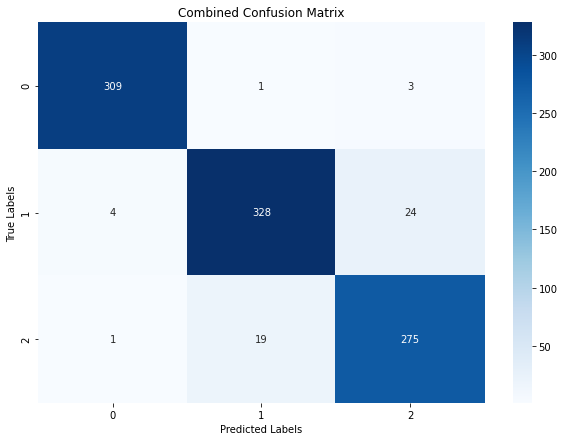

In [19]:
from sklearn.linear_model import LogisticRegression

model_dir= "../models/luad_lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Logistic Regression definition with default hyperparameters
    lr = LogisticRegression(random_state=42)
    # fitting model
    lr.fit(X_train, y_train)
    
    # Save the model
    joblib.dump(lr, model_dir + f"fold_" + str(i) + "_model_topology_lr.pkl")
    
    # prediction output
    pred = lr.predict(X_test)
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_lr.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc_healthy/true_predicted_label_test_"+str(i)+"_lr.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(771, 19648) (771,)
(193, 19648) (193,)
Fold 1 - Accuracy: 0.5648, Precision: 0.6626, Recall: 0.5648, F1 Score: 0.5479
(771, 19648) (771,)
(193, 19648) (193,)
Fold 2 - Accuracy: 0.6114, Precision: 0.7154, Recall: 0.6114, F1 Score: 0.6026
(771, 19648) (771,)
(193, 19648) (193,)
Fold 3 - Accuracy: 0.6425, Precision: 0.7279, Recall: 0.6425, F1 Score: 0.6397
(771, 19648) (771,)
(193, 19648) (193,)
Fold 4 - Accuracy: 0.9171, Precision: 0.9236, Recall: 0.9171, F1 Score: 0.9171
(772, 19648) (772,)
(192, 19648) (192,)
Fold 5 - Accuracy: 0.5573, Precision: 0.6473, Recall: 0.5573, F1 Score: 0.5634
Average Accuracy: 0.6586
Average Precision: 0.7353
Average Recall: 0.6586
Average F1 Score: 0.6541
Combined Confusion Matrix:
[[158 135  20]
 [  3 236 117]
 [  0  54 241]]


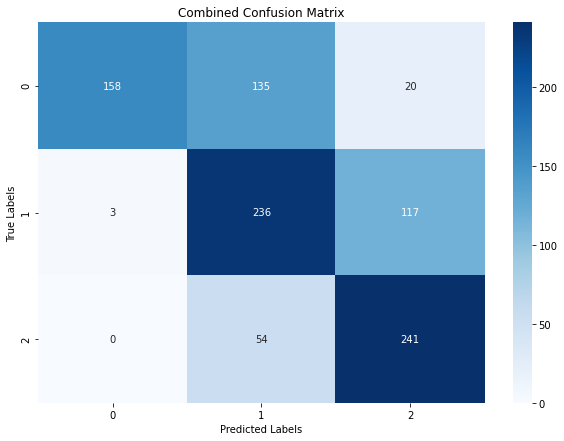

In [20]:
from sklearn.naive_bayes import GaussianNB

model_dir= "../models/luad_lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Naive Bayes definition with default hyperparameters
    nb = GaussianNB()
    # fitting model
    nb.fit(X_train, y_train)
    
    # Save the model
    joblib.dump(nb, model_dir + f"fold_" + str(i) + "_model_topology_nb.pkl")
    
    # prediction output
    pred = nb.predict(X_test)
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_nb.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc_healthy/true_predicted_label_test_"+str(i)+"_nb.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

# LUAD LUSC

(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:00:27] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:01:10] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:01:53] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9615, Precision: 0.9624, Recall: 0.9615, F1 Score: 0.9614
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:02:36] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9462, Precision: 0.9463, Recall: 0.9462, F1 Score: 0.9462
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:03:19] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9538, Precision: 0.9538, Recall: 0.9538, F1 Score: 0.9538
Average Accuracy: 0.9524
Average Precision: 0.9534
Average Recall: 0.9524
Average F1 Score: 0.9523
Combined Confusion Matrix:
[[346  10]
 [ 21 274]]


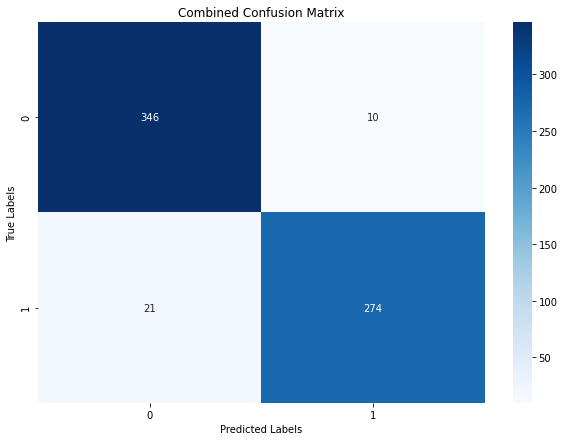

In [11]:
model_dir= "../models/luad_lusc/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # xgboost definition
    xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=2,
                    random_state=42)
    #fitting model
    mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
    # save to JSON
    mcl.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_xgboost.json")
    # prediction output
    pred = mcl.predict(X_test)
    # probability of predicted output
    proba = mcl.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc/AfterDroppingFalsePrediction_test_"+str(i)+"_xgboost.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc/true_predicted_label_test_"+str(i)+"_xgboost.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

Random State: 10
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:23:46] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:24:29] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9308, Precision: 0.9329, Recall: 0.9308, F1 Score: 0.9304
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:25:12] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:25:54] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9308, Precision: 0.9308, Recall: 0.9308, F1 Score: 0.9307
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:26:36] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9615, Precision: 0.9617, Recall: 0.9615, F1 Score: 0.9616
Random State 10 - Average Accuracy: 0.9478
Random State 10 - Average Precision: 0.9484
Random State 10 - Average Recall: 0.9478
Random State 10 - Average F1 Score: 0.9476
Random State 10 - Combined Confusion Matrix:
[[344  12]
 [ 22 273]]


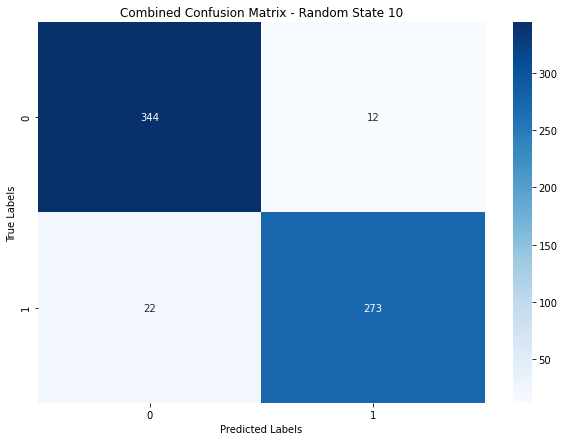

Random State: 20
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:27:19] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9695, Precision: 0.9698, Recall: 0.9695, F1 Score: 0.9694
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:28:01] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9385, Precision: 0.9398, Recall: 0.9385, F1 Score: 0.9382
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:28:43] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9615, Precision: 0.9624, Recall: 0.9615, F1 Score: 0.9614
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:29:26] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9154, Precision: 0.9154, Recall: 0.9154, F1 Score: 0.9153
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:30:08] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9538, Precision: 0.9538, Recall: 0.9538, F1 Score: 0.9538
Random State 20 - Average Accuracy: 0.9477
Random State 20 - Average Precision: 0.9482
Random State 20 - Average Recall: 0.9477
Random State 20 - Average F1 Score: 0.9476
Random State 20 - Combined Confusion Matrix:
[[344  12]
 [ 22 273]]


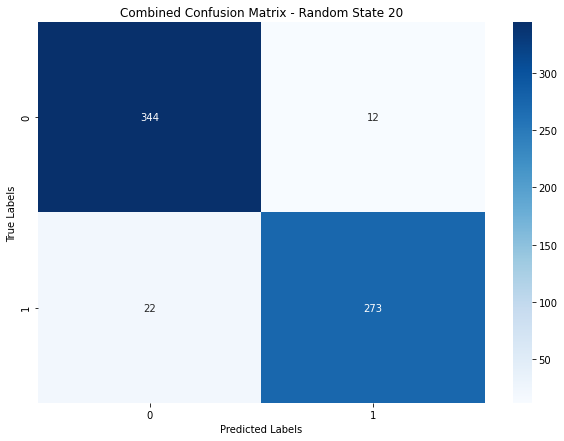

Random State: 30
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:30:50] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:31:33] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:32:15] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9615, Precision: 0.9624, Recall: 0.9615, F1 Score: 0.9614
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:32:57] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9308, Precision: 0.9310, Recall: 0.9308, F1 Score: 0.9308
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:33:38] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9538, Precision: 0.9538, Recall: 0.9538, F1 Score: 0.9538
Random State 30 - Average Accuracy: 0.9493
Random State 30 - Average Precision: 0.9503
Random State 30 - Average Recall: 0.9493
Random State 30 - Average F1 Score: 0.9492
Random State 30 - Combined Confusion Matrix:
[[345  11]
 [ 22 273]]


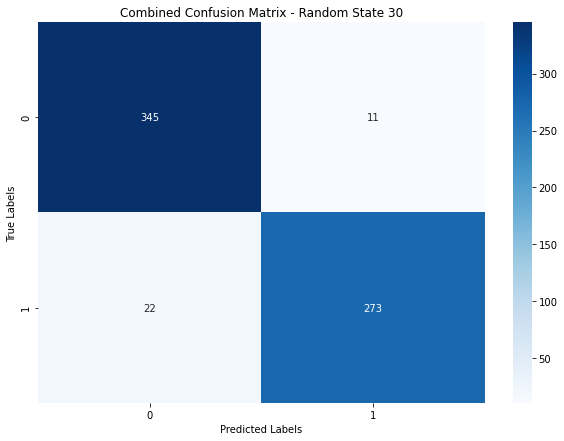

Random State: 40
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:34:20] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9695, Precision: 0.9698, Recall: 0.9695, F1 Score: 0.9694
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:35:02] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:35:46] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:36:28] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9308, Precision: 0.9308, Recall: 0.9308, F1 Score: 0.9307
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:37:10] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9462, Precision: 0.9462, Recall: 0.9462, F1 Score: 0.9461
Random State 40 - Average Accuracy: 0.9477
Random State 40 - Average Precision: 0.9485
Random State 40 - Average Recall: 0.9477
Random State 40 - Average F1 Score: 0.9476
Random State 40 - Combined Confusion Matrix:
[[345  11]
 [ 23 272]]


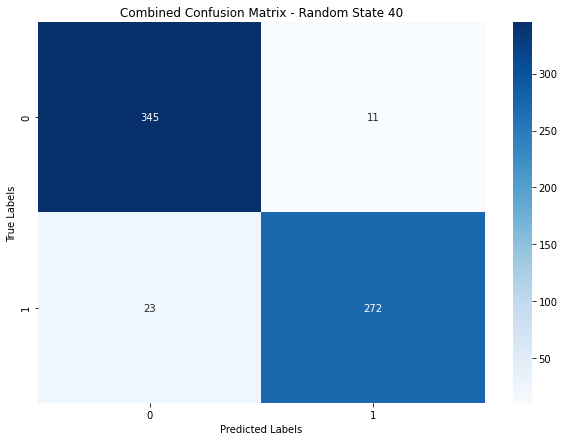

Random State: 50
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:37:53] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9695, Precision: 0.9698, Recall: 0.9695, F1 Score: 0.9694
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:38:35] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:39:19] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9615, Precision: 0.9624, Recall: 0.9615, F1 Score: 0.9614
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:40:01] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9154, Precision: 0.9154, Recall: 0.9154, F1 Score: 0.9153
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:40:43] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9462, Precision: 0.9462, Recall: 0.9462, F1 Score: 0.9461
Random State 50 - Average Accuracy: 0.9462
Random State 50 - Average Precision: 0.9471
Random State 50 - Average Recall: 0.9462
Random State 50 - Average F1 Score: 0.9461
Random State 50 - Combined Confusion Matrix:
[[345  11]
 [ 24 271]]


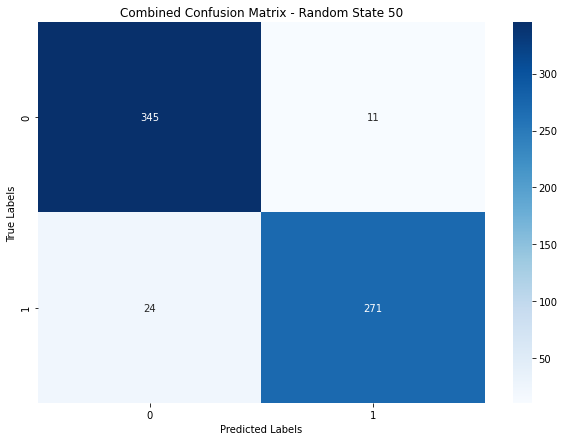

Random State: 60
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:41:26] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:42:09] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:42:51] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9615, Precision: 0.9624, Recall: 0.9615, F1 Score: 0.9614
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:43:34] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9308, Precision: 0.9308, Recall: 0.9308, F1 Score: 0.9307
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:44:16] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9538, Precision: 0.9538, Recall: 0.9538, F1 Score: 0.9538
Random State 60 - Average Accuracy: 0.9493
Random State 60 - Average Precision: 0.9503
Random State 60 - Average Recall: 0.9493
Random State 60 - Average F1 Score: 0.9492
Random State 60 - Combined Confusion Matrix:
[[346  10]
 [ 23 272]]


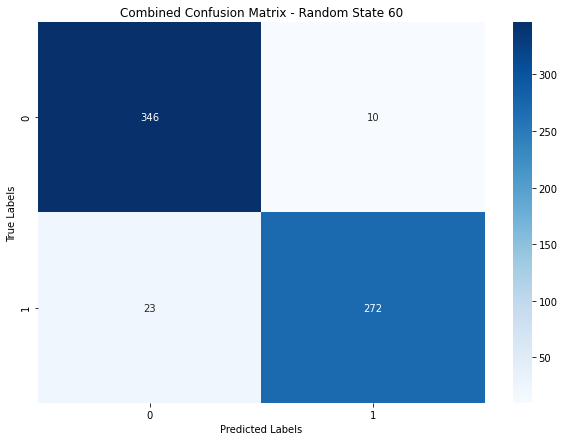

Random State: 70
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:44:58] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9695, Precision: 0.9698, Recall: 0.9695, F1 Score: 0.9694
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:45:40] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:46:23] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:47:06] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9308, Precision: 0.9308, Recall: 0.9308, F1 Score: 0.9307
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:47:48] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9462, Precision: 0.9462, Recall: 0.9462, F1 Score: 0.9461
Random State 70 - Average Accuracy: 0.9477
Random State 70 - Average Precision: 0.9485
Random State 70 - Average Recall: 0.9477
Random State 70 - Average F1 Score: 0.9476
Random State 70 - Combined Confusion Matrix:
[[345  11]
 [ 23 272]]


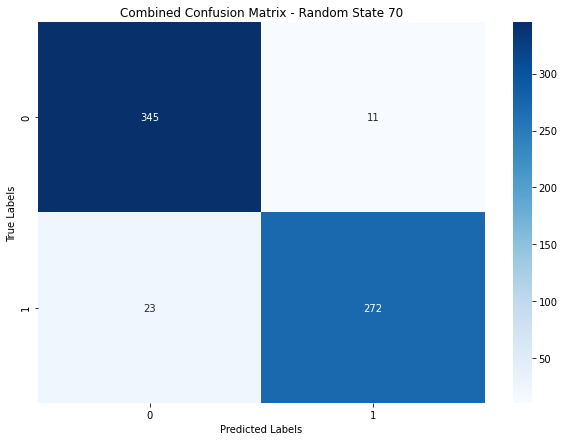

Random State: 80
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:48:31] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:49:15] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9308, Precision: 0.9329, Recall: 0.9308, F1 Score: 0.9304
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:49:57] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9692, Precision: 0.9709, Recall: 0.9692, F1 Score: 0.9691
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:50:39] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9231, Precision: 0.9231, Recall: 0.9231, F1 Score: 0.9231
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:51:23] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9538, Precision: 0.9538, Recall: 0.9538, F1 Score: 0.9538
Random State 80 - Average Accuracy: 0.9478
Random State 80 - Average Precision: 0.9487
Random State 80 - Average Recall: 0.9478
Random State 80 - Average F1 Score: 0.9476
Random State 80 - Combined Confusion Matrix:
[[345  11]
 [ 23 272]]


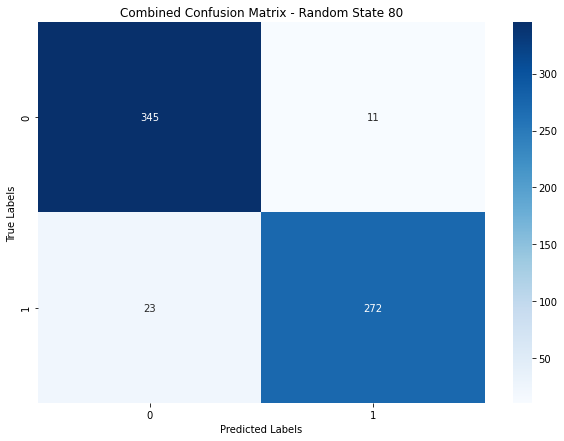

Random State: 90
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:52:05] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:52:47] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:53:31] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:54:13] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9154, Precision: 0.9154, Recall: 0.9154, F1 Score: 0.9153
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:54:55] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 90 - Average Accuracy: 0.9447
Random State 90 - Average Precision: 0.9456
Random State 90 - Average Recall: 0.9447
Random State 90 - Average F1 Score: 0.9445
Random State 90 - Combined Confusion Matrix:
[[345  11]
 [ 25 270]]


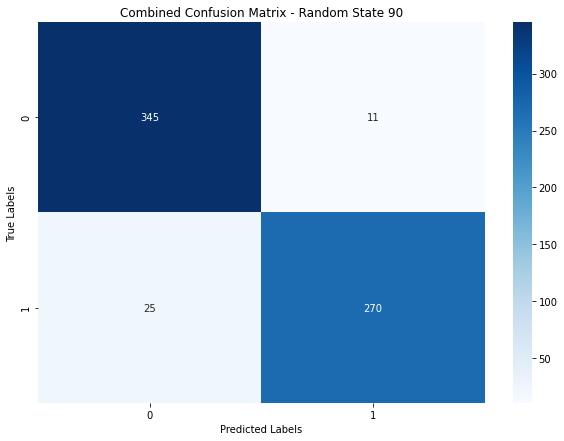

Random State: 100
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:55:38] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:56:21] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:57:03] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:57:46] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9231, Precision: 0.9231, Recall: 0.9231, F1 Score: 0.9231
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:58:27] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9538, Precision: 0.9538, Recall: 0.9538, F1 Score: 0.9538
Random State 100 - Average Accuracy: 0.9462
Random State 100 - Average Precision: 0.9471
Random State 100 - Average Recall: 0.9462
Random State 100 - Average F1 Score: 0.9461
Random State 100 - Combined Confusion Matrix:
[[344  12]
 [ 23 272]]


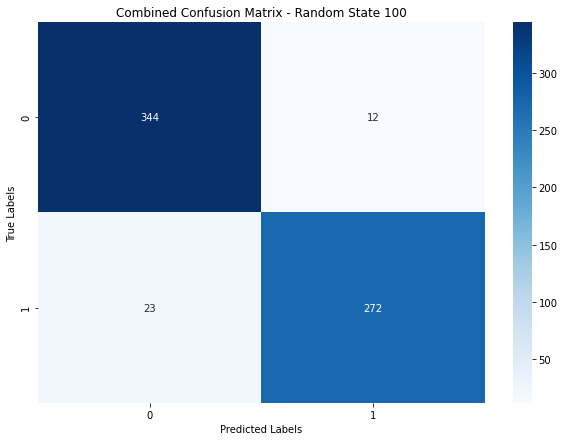

In [64]:
# inclusion of many random states; xgboost; no hp

model_dir = "../models/luad_lusc/"

# Lists to store the scores for each random state
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for random_state in random_states:
    print(f"Random State: {random_state}")

    # Lists to store the scores for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Lists to accumulate true and predicted labels for all folds
    all_true_labels = []
    all_pred_labels = []

    for i in range(1, 6):
        newdftrain = pd.read_csv("../Data/luad_lusc/train_split_" + str(i) + ".csv")
        newdftrain.index = newdftrain["Sample"]
        newdftest = pd.read_csv("../Data/luad_lusc/test_split_" + str(i) + ".csv")
        newdftest.index = newdftest["Sample"]
        X_train, y_train = newdftrain.iloc[:, 0:19648], newdftrain['label'].values
        X_test, y_test = newdftest.iloc[:, 0:19648], newdftest['label'].values
        print(X_train.shape, y_train.shape)
        print(X_test.shape, y_test.shape)

        # XGBoost definition with varying random state
        xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=2,
                    random_state=random_state)
        # Fitting model
        mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
        # Save to JSON
        mcl.save_model(model_dir + f"fold_" + str(i) + f"_model_topology_xgboost_hp_random_state_{random_state}.json")
        # Prediction output
        pred = mcl.predict(X_test)
        # Probability of predicted output
        proba = mcl.predict_proba(X_test)

        # Append true and predicted labels
        all_true_labels.extend(y_test)
        all_pred_labels.extend(pred)

        # Calculate metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='weighted')
        recall = recall_score(y_test, pred, average='weighted')
        f1 = f1_score(y_test, pred, average='weighted')

        # Append scores to the lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print scores for the current fold
        print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        # Store labels for results
        y_map = pd.DataFrame(data=y_test, columns=['class'])
        y_map['pred'] = pred
        y_map['true_label'] = y_map['class'].map({'luad': 1, 'lusc': 2})
        y_map['pred_label'] = y_map['pred'].map({'luad': 1, 'lusc': 2})
        y_map.index = X_test.index

        # Adding true and predicted label to X_test
        X_test['true_label'] = y_map['true_label']
        X_test['predicted_label'] = y_map['pred_label']

        # Drop false predictions
        X_test = drop_false_pred(X_test)
        X_test.to_csv(f"../Output/luad_lusc/AfterDroppingFalsePrediction_test_{i}_xgboost_hp_random_state_{random_state}.csv")

        # New y_map
        y_map_new = y_map[y_map.index.isin(X_test.index.tolist())]
        y_map_new.to_csv(f"../Output/luad_lusc/true_predicted_label_test_{i}_xgboost_hp_random_state_{random_state}.csv")

    # Calculate average scores
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print average scores
    print(f"Random State {random_state} - Average Accuracy: {avg_accuracy:.4f}")
    print(f"Random State {random_state} - Average Precision: {avg_precision:.4f}")
    print(f"Random State {random_state} - Average Recall: {avg_recall:.4f}")
    print(f"Random State {random_state} - Average F1 Score: {avg_f1:.4f}")

    # Calculate combined confusion matrix
    combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
    print(f"Random State {random_state} - Combined Confusion Matrix:")
    print(combined_cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Combined Confusion Matrix - Random State {random_state}')
    plt.show()

In [43]:
# CNN
# convert to 2D model function

def convert_2d(df):
    np_array = df.values
    # pixel length
    pixel_length = math.ceil(math.sqrt(df.shape[1]))
    print(pixel_length)
    
    #padding
    pad_length = pixel_length ** 2 - df.shape[1]
    print(pad_length)
    
    np_array_padded = np.pad(np_array, ((0, 0), (0, pad_length)), mode="constant")
    print(np_array_padded)
    
    #reshaping
    np_array_2d = np.reshape(
        np_array_padded, (np_array_padded.shape[0], pixel_length, pixel_length)
    )
    print(np_array_2d.shape)
    np_array_2d_1 = np.expand_dims(np_array_2d, axis=3)
    print(np_array_2d_1.shape)
    return np_array_2d_1

#one hot encoding for labels

def convert_onehot(df_labels):
    np_labels = np.array(df_labels)
    print(np_labels)
    encoder = LabelBinarizer()
    print(encoder)
    np_labels_onehot = encoder.fit_transform(np_labels)
    return np_labels_onehot


# best model
# round 5
# CNN model

def keras_cnn(X, y, loss_func="categorical_crossentropy"):
    model = Sequential()

    model.add(
        Conv2D(32, (3, 3), input_shape=(X.shape[1], X.shape[2], 1), padding="same")
    )
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    

    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))

    model.add(Conv2D(256, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.2))

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))

    model.add(Dense(y.shape[1]))
    model.add(Activation("softmax"))

    model.compile(
        loss=loss_func,
#         optimizer=RMSprop(lr=0.01, rho=0.9, decay=0.01),
        optimizer=RMSprop(lr=0.01,decay=0.02),
        metrics=["accuracy"],
    )

    return model

# dropping the samples that did not predict correctly
def drop_false_pred(df):
    #df = df[df.predicted_label == df.true_label].copy()
    df = df[df.predicted_label.astype(int) == df.true_label.astype(int)].copy()
    df.drop(["predicted_label","true_label"], axis=1, inplace=True),
    return df

model_dir= "../models/luad_lusc/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []


for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
    #     newdftrain=newdftrain.drop(["Unnamed: 0"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    
    # CNN model
    X_train_converted = convert_2d(X_train)
    # print(X_train_converted.shape)
    
    y_train_converted = convert_onehot(y_train)
    # print(y_train_converted.shape)
    
    model = keras_cnn(X_train_converted, y_train_converted)
    print("Model Initiated. Run_"+ str(i))
    
    # Train model beautifully
    model.fit(
        X_train_converted, 
        y_train_converted, 
        batch_size=32, 
        epochs=30,
        #epochs=2,
        verbose=1,
        validation_split=0.2, 
    ) 
    
    from keras.models import model_from_json

    # Save model JSON and weights
#     model_dir="../model/"
    model_json = model.to_json()
    with open(model_dir+"CNN_model_bestModel_test_"+str(i)+"_CNN.json", "w") as json_file:
        json_file.write(model_json)

    model.save_weights(model_dir+"CNN_model_bestModel_model_weights_test_"+str(i)+".hdf5")
    
    # X test values
    X_test_copy= X_test
    X_test = convert_2d(X_test)
    lb = LabelBinarizer()
    lb.fit(y_test)
    
    
    # Run predictions and add everything to a giant DataFrame
#     y_preds = model.predict_classes(
#         X_test
#     )
    y_preds= np.argmax(model.predict(X_test),axis=1)
    num_preds = len(y_preds)
    #print(num_preds)

    #classes = df["target"].unique()
    classes = np.unique(y_test)
    num_classes = len(classes)
    #print(num_classes)
    
    #true label and pred label mapping
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= y_preds
    y_map['pred']=y_map['pred'].map({0: 'healthy',1: 'luad',2:'lusc'})
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test_copy.index
    
    
    # adding true and predicted label to X_test
    X_test_copy['true_label']= y_map['true_label']
    X_test_copy['predicted_label']= y_map['pred_label']

    # drop false prediction
    X_test_copy=drop_false_pred(X_test_copy)
#     X_test_copy.to_csv("../Output/Output_CNN/CNN_AfterDroppingFalsePrediction_test_"+str(i)+".csv")
                       
    # new y_map
    #y_map_new= pd.DataFrame()
    y_map_new= y_map[y_map.index.isin(X_test_copy.index.tolist())]
#     y_map_new.to_csv("../Output/Output_CNN/CNN_true_predicted_label_test_"+str(i)+".csv")

    # F1 score and accuracy
    y_preds_onehot = np.zeros([num_preds, num_classes])
    y_preds_onehot[np.arange(num_preds), y_preds] = 1
    y_preds_labels = lb.inverse_transform(y_preds_onehot)

    print(f"macro-average F1 : {f1_score(y_test, y_preds_labels, average='macro')}")
    conf_mat = confusion_matrix(y_preds_labels, y_test)
    acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
    print('Overall accuracy: {} %'.format(acc*100))

                       
                       

(520, 19648) (520,)
(131, 19648) (131,)
141
233
[[  44.89  172.65  414.87 ...    0.      0.      0.  ]
 [  41.52  166.73 1030.12 ...    0.      0.      0.  ]
 [  34.02  111.99  186.4  ...    0.      0.      0.  ]
 ...
 [ 497.    169.07  205.5  ...    0.      0.      0.  ]
 [ 423.61  373.81   72.52 ...    0.      0.      0.  ]
 [   0.     55.49  813.63 ...    0.      0.      0.  ]]
(520, 141, 141)
(520, 141, 141, 1)
['luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad

The `lr` argument is deprecated, use `learning_rate` instead.


13/13 [==============================] - 3s 152ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3173 - val_l

Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


13/13 [==============================] - 3s 152ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
13/13 [==============================] - 2s 130ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
13/13 [==============================] - 2s 131ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_l

Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


13/13 [==============================] - 3s 150ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_l

Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


13/13 [==============================] - 3s 151ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
13/13 [==============================] - 2s 130ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
13/13 [==============================] - 2s 130ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
13/13 [==============================] - 2s 130ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
13/13 [==============================] - 2s 130ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_l

Model Initiated. Run_5
Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


13/13 [==============================] - 3s 152ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
13/13 [==============================] - 2s 129ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
13/13 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - accuracy: 0.3149 - val_l

Random State: 10
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 10 - Average Accuracy: 0.9478
Random State 10 - Average Precision: 0.9487
Random State 10 - Average Recall: 0.9478
Random State 10 - Average F1 Score: 0.9476
Random State 10 - Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


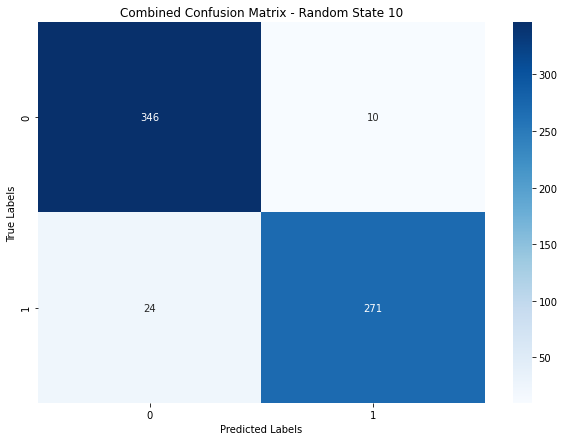

Random State: 20
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 20 - Average Accuracy: 0.9478
Random State 20 - Average Precision: 0.9487
Random State 20 - Average Recall: 0.9478
Random State 20 - Average F1 Score: 0.9476
Random State 20 - Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


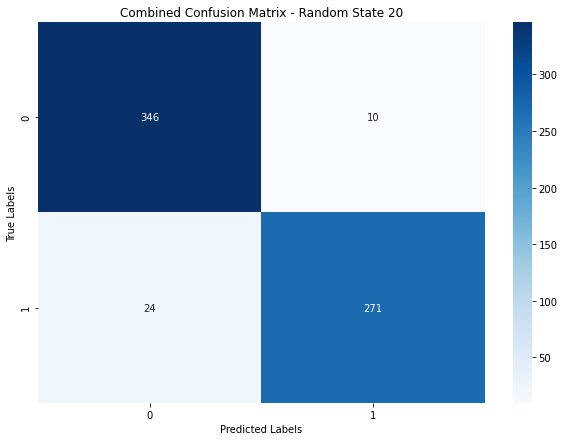

Random State: 30
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 30 - Average Accuracy: 0.9478
Random State 30 - Average Precision: 0.9487
Random State 30 - Average Recall: 0.9478
Random State 30 - Average F1 Score: 0.9476
Random State 30 - Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


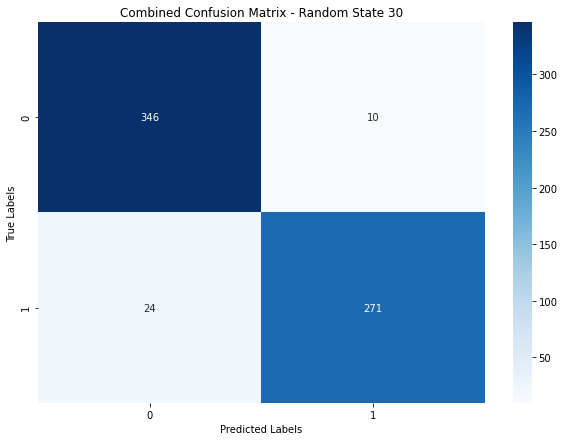

Random State: 40
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 40 - Average Accuracy: 0.9478
Random State 40 - Average Precision: 0.9487
Random State 40 - Average Recall: 0.9478
Random State 40 - Average F1 Score: 0.9476
Random State 40 - Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


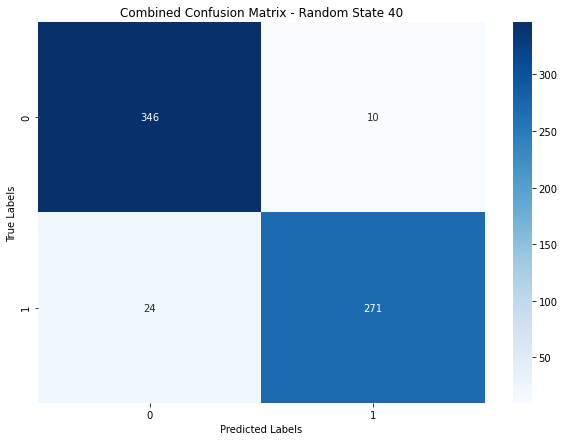

Random State: 50
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 50 - Average Accuracy: 0.9478
Random State 50 - Average Precision: 0.9487
Random State 50 - Average Recall: 0.9478
Random State 50 - Average F1 Score: 0.9476
Random State 50 - Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


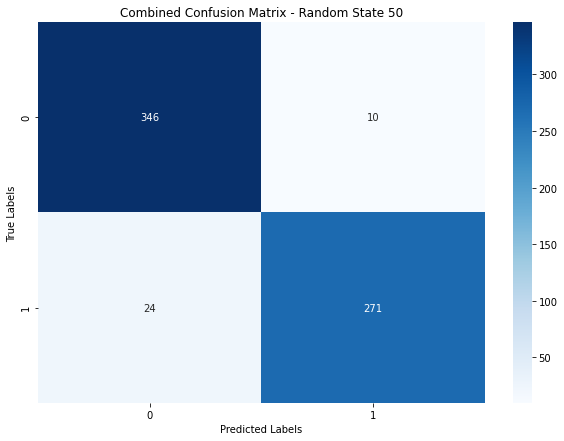

Random State: 60
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 60 - Average Accuracy: 0.9478
Random State 60 - Average Precision: 0.9487
Random State 60 - Average Recall: 0.9478
Random State 60 - Average F1 Score: 0.9476
Random State 60 - Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


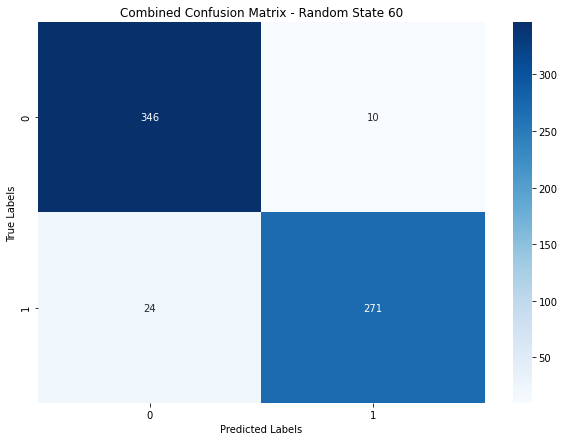

Random State: 70
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 70 - Average Accuracy: 0.9478
Random State 70 - Average Precision: 0.9487
Random State 70 - Average Recall: 0.9478
Random State 70 - Average F1 Score: 0.9476
Random State 70 - Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


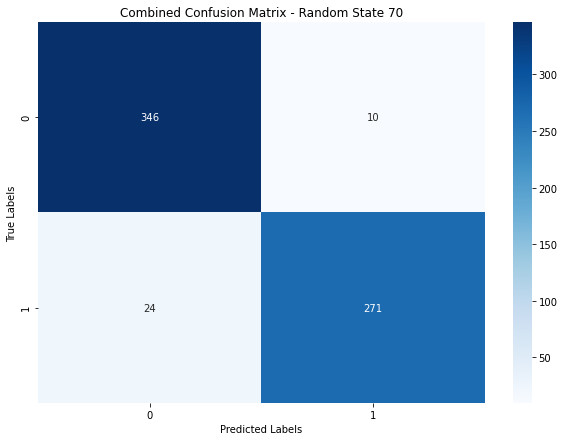

Random State: 80
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 80 - Average Accuracy: 0.9478
Random State 80 - Average Precision: 0.9487
Random State 80 - Average Recall: 0.9478
Random State 80 - Average F1 Score: 0.9476
Random State 80 - Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


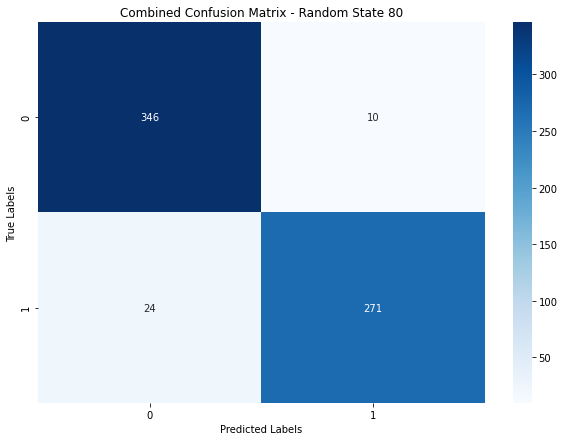

Random State: 90
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 90 - Average Accuracy: 0.9478
Random State 90 - Average Precision: 0.9487
Random State 90 - Average Recall: 0.9478
Random State 90 - Average F1 Score: 0.9476
Random State 90 - Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


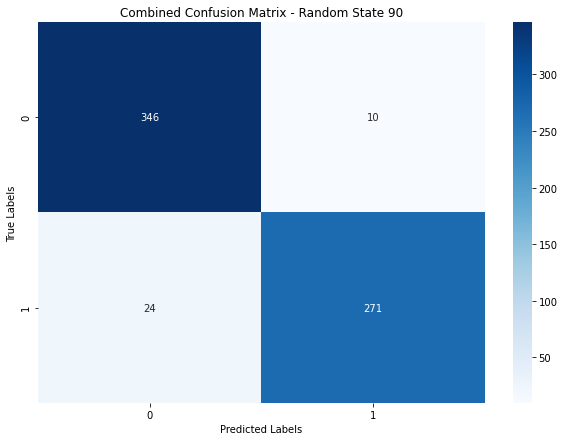

Random State: 100
(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Random State 100 - Average Accuracy: 0.9478
Random State 100 - Average Precision: 0.9487
Random State 100 - Average Recall: 0.9478
Random State 100 - Average F1 Score: 0.9476
Random State 100 - Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


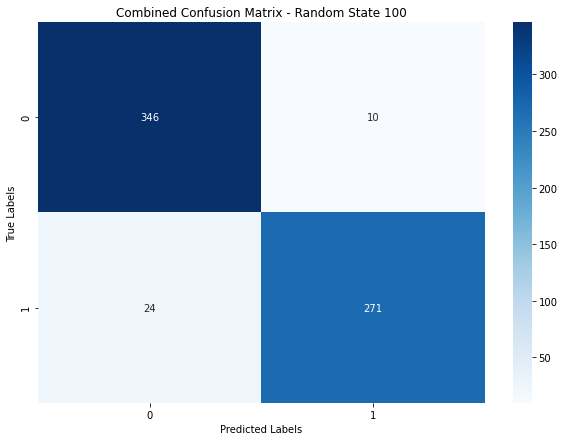

In [54]:
# inclusion of many random states; xgboost; no hp

model_dir = "../models/luad_lusc/"

# Lists to store the scores for each random state
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for random_state in random_states:
    print(f"Random State: {random_state}")

    # Lists to store the scores for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Lists to accumulate true and predicted labels for all folds
    all_true_labels = []
    all_pred_labels = []

    for i in range(1, 6):
        newdftrain = pd.read_csv("../Data/luad_lusc/train_split_" + str(i) + ".csv")
        newdftrain.index = newdftrain["Sample"]
        newdftest = pd.read_csv("../Data/luad_lusc/test_split_" + str(i) + ".csv")
        newdftest.index = newdftest["Sample"]
        X_train, y_train = newdftrain.iloc[:, 0:19648], newdftrain['label'].values
        X_test, y_test = newdftest.iloc[:, 0:19648], newdftest['label'].values
        print(X_train.shape, y_train.shape)
        print(X_test.shape, y_test.shape)

        # XGBoost definition with varying random state
        xgbc = xgb.XGBClassifier(random_state=random_state)
        # Fitting model
        mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
        # Save to JSON
        mcl.save_model(model_dir + f"fold_" + str(i) + f"_model_topology_xgboost_nohp_random_state_{random_state}.json")
        # Prediction output
        pred = mcl.predict(X_test)
        # Probability of predicted output
        proba = mcl.predict_proba(X_test)

        # Append true and predicted labels
        all_true_labels.extend(y_test)
        all_pred_labels.extend(pred)

        # Calculate metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='weighted')
        recall = recall_score(y_test, pred, average='weighted')
        f1 = f1_score(y_test, pred, average='weighted')

        # Append scores to the lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print scores for the current fold
        print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        # Store labels for results
        y_map = pd.DataFrame(data=y_test, columns=['class'])
        y_map['pred'] = pred
        y_map['true_label'] = y_map['class'].map({'luad': 1, 'lusc': 2})
        y_map['pred_label'] = y_map['pred'].map({'luad': 1, 'lusc': 2})
        y_map.index = X_test.index

        # Adding true and predicted label to X_test
        X_test['true_label'] = y_map['true_label']
        X_test['predicted_label'] = y_map['pred_label']

        # Drop false predictions
        X_test = drop_false_pred(X_test)
        X_test.to_csv(f"../Output/luad_lusc/AfterDroppingFalsePrediction_test_{i}_xgboost_nohp_random_state_{random_state}.csv")

        # New y_map
        y_map_new = y_map[y_map.index.isin(X_test.index.tolist())]
        y_map_new.to_csv(f"../Output/luad_lusc/true_predicted_label_test_{i}_xgboost_nohp_random_state_{random_state}.csv")

    # Calculate average scores
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print average scores
    print(f"Random State {random_state} - Average Accuracy: {avg_accuracy:.4f}")
    print(f"Random State {random_state} - Average Precision: {avg_precision:.4f}")
    print(f"Random State {random_state} - Average Recall: {avg_recall:.4f}")
    print(f"Random State {random_state} - Average F1 Score: {avg_f1:.4f}")

    # Calculate combined confusion matrix
    combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
    print(f"Random State {random_state} - Combined Confusion Matrix:")
    print(combined_cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Combined Confusion Matrix - Random State {random_state}')
    plt.show()

(520, 19648) (520,)
(131, 19648) (131,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9618, Precision: 0.9626, Recall: 0.9618, F1 Score: 0.9617
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9385, Precision: 0.9418, Recall: 0.9385, F1 Score: 0.9381
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9538, Precision: 0.9541, Recall: 0.9538, F1 Score: 0.9538
Average Accuracy: 0.9478
Average Precision: 0.9487
Average Recall: 0.9478
Average F1 Score: 0.9476
Combined Confusion Matrix:
[[346  10]
 [ 24 271]]


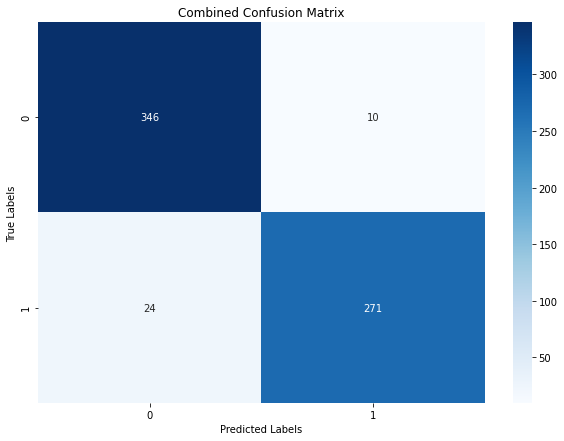

In [22]:
#XGBoost no HP

model_dir= "../models/luad_lusc/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # xgboost definition
    xgbc = xgb.XGBClassifier(random_state=42)
    #fitting model
    mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
    # save to JSON
    mcl.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_xgboost_nohp.json")
    # prediction output
    pred = mcl.predict(X_test)
    # probability of predicted output
    proba = mcl.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc/AfterDroppingFalsePrediction_test_"+str(i)+"_xgboost_nohp.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc/true_predicted_label_test_"+str(i)+"_xgboost_nohp.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()


(520, 19648) (520,)
(131, 19648) (131,)
Fold 1 - Accuracy: 0.9466, Precision: 0.9473, Recall: 0.9466, F1 Score: 0.9464
(521, 19648) (521,)
(130, 19648) (130,)
Fold 2 - Accuracy: 0.9231, Precision: 0.9243, Recall: 0.9231, F1 Score: 0.9228
(521, 19648) (521,)
(130, 19648) (130,)
Fold 3 - Accuracy: 0.9538, Precision: 0.9553, Recall: 0.9538, F1 Score: 0.9537
(521, 19648) (521,)
(130, 19648) (130,)
Fold 4 - Accuracy: 0.9462, Precision: 0.9463, Recall: 0.9462, F1 Score: 0.9462
(521, 19648) (521,)
(130, 19648) (130,)
Fold 5 - Accuracy: 0.9615, Precision: 0.9616, Recall: 0.9615, F1 Score: 0.9615
Average Accuracy: 0.9462
Average Precision: 0.9470
Average Recall: 0.9462
Average F1 Score: 0.9461
Combined Confusion Matrix:
[[344  12]
 [ 23 272]]


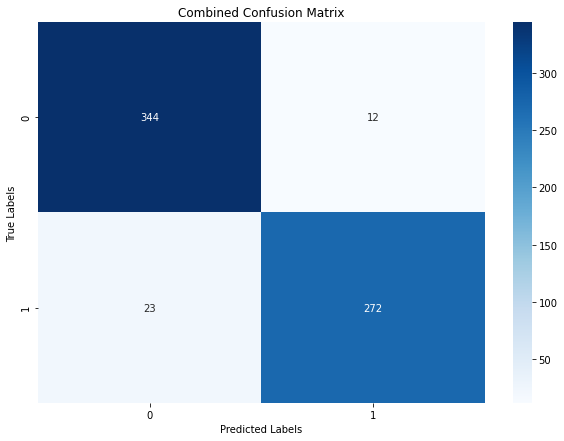

In [23]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# RF

model_dir= "../models/luad_lusc/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Random Forest definition
    rf = RandomForestClassifier()
    # fitting model
    rf.fit(X_train, y_train)

    # Save the model
    joblib.dump(rf, model_dir + f"fold_" + str(i) + "_model_topology_rf.pkl")
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")
    # prediction output
    pred = rf.predict(X_test)
    # probability of predicted output
    proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc/AfterDroppingFalsePrediction_test_"+str(i)+"_rf.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc/true_predicted_label_test_"+str(i)+"_rf.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(520, 19648) (520,)
(131, 19648) (131,)
Fold 1 - Accuracy: 0.9160, Precision: 0.9231, Recall: 0.9160, F1 Score: 0.9150
(521, 19648) (521,)
(130, 19648) (130,)
Fold 2 - Accuracy: 0.9538, Precision: 0.9553, Recall: 0.9538, F1 Score: 0.9537
(521, 19648) (521,)
(130, 19648) (130,)
Fold 3 - Accuracy: 0.9462, Precision: 0.9469, Recall: 0.9462, F1 Score: 0.9460
(521, 19648) (521,)
(130, 19648) (130,)
Fold 4 - Accuracy: 0.9231, Precision: 0.9233, Recall: 0.9231, F1 Score: 0.9229
(521, 19648) (521,)
(130, 19648) (130,)
Fold 5 - Accuracy: 0.9231, Precision: 0.9261, Recall: 0.9231, F1 Score: 0.9226
Average Accuracy: 0.9324
Average Precision: 0.9350
Average Recall: 0.9324
Average F1 Score: 0.9320
Combined Confusion Matrix:
[[346  10]
 [ 34 261]]


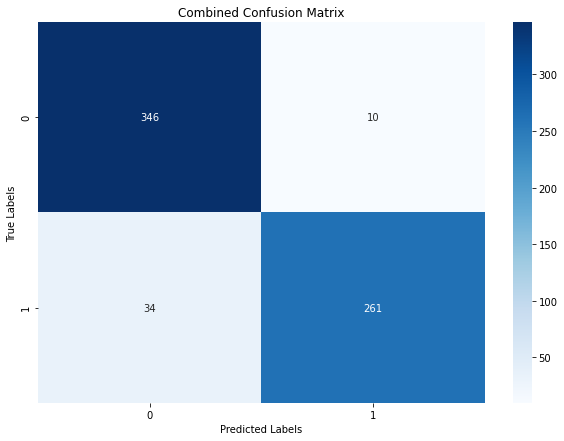

In [24]:
from sklearn.svm import SVC


model_dir= "../models/luad_lusc/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # SVM definition with default hyperparameters
    svm = SVC(probability=True, random_state=42)
    # fitting model
    svm.fit(X_train, y_train)
    
    # prediction output
    pred = svm.predict(X_test)

    # Save the model
    joblib.dump(svm, model_dir + f"fold_" + str(i) + "_model_topology_svm.pkl")
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc/AfterDroppingFalsePrediction_test_"+str(i)+"_svm.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc/true_predicted_label_test_"+str(i)+"_svm.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(520, 19648) (520,)
(131, 19648) (131,)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 1 - Accuracy: 0.9313, Precision: 0.9319, Recall: 0.9313, F1 Score: 0.9311
(521, 19648) (521,)
(130, 19648) (130,)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 2 - Accuracy: 0.9231, Precision: 0.9243, Recall: 0.9231, F1 Score: 0.9228
(521, 19648) (521,)
(130, 19648) (130,)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 3 - Accuracy: 0.9308, Precision: 0.9308, Recall: 0.9308, F1 Score: 0.9307
(521, 19648) (521,)
(130, 19648) (130,)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 4 - Accuracy: 0.9385, Precision: 0.9427, Recall: 0.9385, F1 Score: 0.9386
(521, 19648) (521,)
(130, 19648) (130,)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 5 - Accuracy: 0.9385, Precision: 0.9387, Recall: 0.9385, F1 Score: 0.9384
Average Accuracy: 0.9324
Average Precision: 0.9337
Average Recall: 0.9324
Average F1 Score: 0.9323
Combined Confusion Matrix:
[[336  20]
 [ 24 271]]


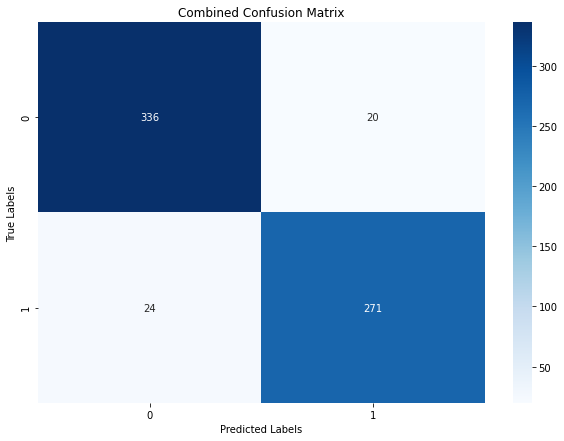

In [25]:
from sklearn.linear_model import LogisticRegression

model_dir= "../models/luad_lusc/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Logistic Regression definition with default hyperparameters
    lr = LogisticRegression(random_state=42)
    # fitting model
    lr.fit(X_train, y_train)
    
    # Save the model
    joblib.dump(lr, model_dir + f"fold_" + str(i) + "_model_topology_lr.pkl")
    
    # prediction output
    pred = lr.predict(X_test)
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc/AfterDroppingFalsePrediction_test_"+str(i)+"_lr.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc/true_predicted_label_test_"+str(i)+"_lr.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(520, 19648) (520,)
(131, 19648) (131,)
Fold 1 - Accuracy: 0.9008, Precision: 0.9010, Recall: 0.9008, F1 Score: 0.9008
(521, 19648) (521,)
(130, 19648) (130,)
Fold 2 - Accuracy: 0.9231, Precision: 0.9243, Recall: 0.9231, F1 Score: 0.9228
(521, 19648) (521,)
(130, 19648) (130,)
Fold 3 - Accuracy: 0.9385, Precision: 0.9387, Recall: 0.9385, F1 Score: 0.9384
(521, 19648) (521,)
(130, 19648) (130,)
Fold 4 - Accuracy: 0.9231, Precision: 0.9237, Recall: 0.9231, F1 Score: 0.9232
(521, 19648) (521,)
(130, 19648) (130,)
Fold 5 - Accuracy: 0.9308, Precision: 0.9308, Recall: 0.9308, F1 Score: 0.9307
Average Accuracy: 0.9232
Average Precision: 0.9237
Average Recall: 0.9232
Average F1 Score: 0.9232
Combined Confusion Matrix:
[[333  23]
 [ 27 268]]


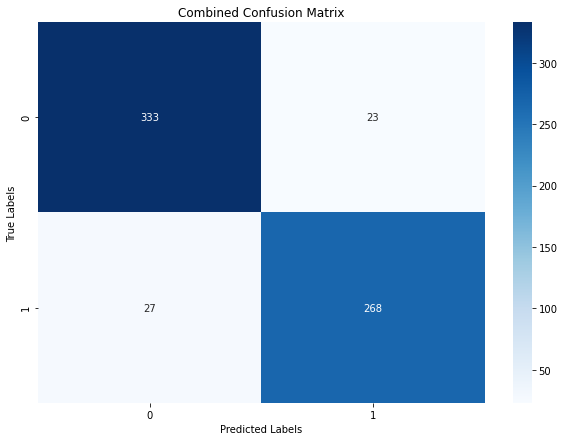

In [26]:
from sklearn.naive_bayes import GaussianNB

model_dir= "../models/luad_lusc/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_lusc/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_lusc/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Naive Bayes definition with default hyperparameters
    nb = GaussianNB()
    # fitting model
    nb.fit(X_train, y_train)
    
    # Save the model
    joblib.dump(nb, model_dir + f"fold_" + str(i) + "_model_topology_nb.pkl")
    
    # prediction output
    pred = nb.predict(X_test)
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_lusc/AfterDroppingFalsePrediction_test_"+str(i)+"_nb.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_lusc/true_predicted_label_test_"+str(i)+"_nb.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

# LUAD Healthy

(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:04:02] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:04:39] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:05:16] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:05:53] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:06:29] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Average Accuracy: 0.9925
Average Precision: 0.9927
Average Recall: 0.9925
Average F1 Score: 0.9925
Combined Confusion Matrix:
[[312   1]
 [  4 352]]


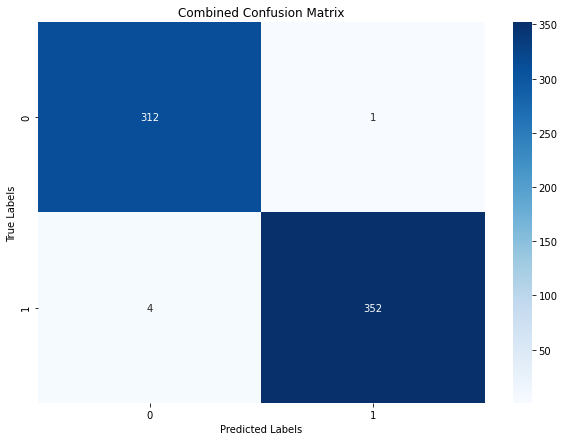

In [12]:
model_dir= "../models/luad_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # xgboost definition
    xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=2,
                    random_state=42)
    #fitting model
    mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
    # save to JSON
    mcl.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_xgboost.json")
    # prediction output
    pred = mcl.predict(X_test)
    # probability of predicted output
    proba = mcl.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_xgboost.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_healthy/true_predicted_label_test_"+str(i)+"_xgboost.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

Random State: 10
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:59:10] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[01:59:45] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9776, Precision: 0.9786, Recall: 0.9776, F1 Score: 0.9776
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:00:19] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:00:55] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:01:30] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 10 - Average Accuracy: 0.9910
Random State 10 - Average Precision: 0.9913
Random State 10 - Average Recall: 0.9910
Random State 10 - Average F1 Score: 0.9910
Random State 10 - Combined Confusion Matrix:
[[312   1]
 [  5 351]]


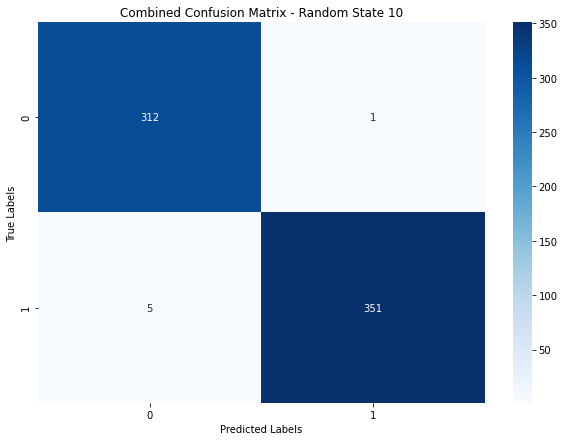

Random State: 20
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:02:06] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:02:41] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:03:16] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:03:52] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:04:28] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 20 - Average Accuracy: 0.9910
Random State 20 - Average Precision: 0.9912
Random State 20 - Average Recall: 0.9910
Random State 20 - Average F1 Score: 0.9910
Random State 20 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


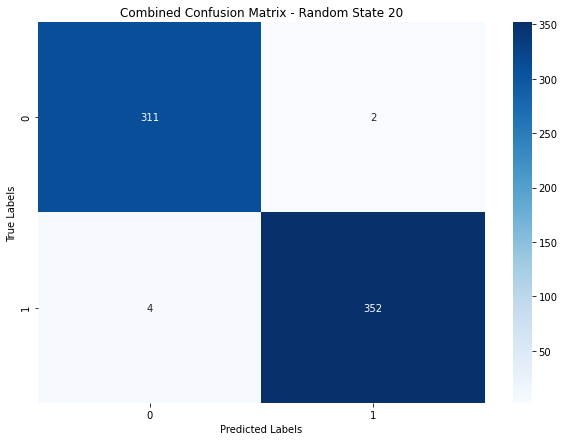

Random State: 30
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:05:03] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:05:38] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:06:13] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:06:49] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:07:25] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 30 - Average Accuracy: 0.9940
Random State 30 - Average Precision: 0.9941
Random State 30 - Average Recall: 0.9940
Random State 30 - Average F1 Score: 0.9940
Random State 30 - Combined Confusion Matrix:
[[312   1]
 [  3 353]]


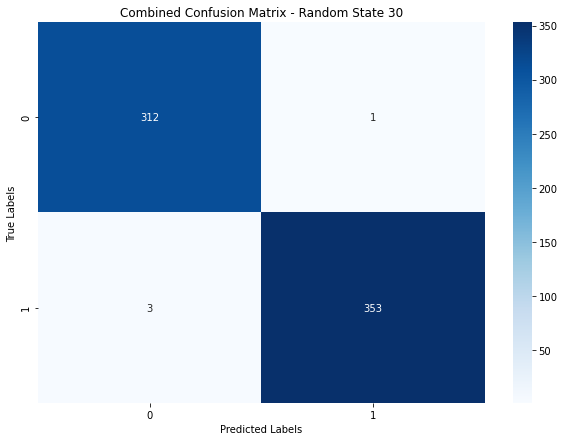

Random State: 40
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:08:01] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:08:36] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:09:11] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:09:46] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:10:22] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 40 - Average Accuracy: 0.9910
Random State 40 - Average Precision: 0.9912
Random State 40 - Average Recall: 0.9910
Random State 40 - Average F1 Score: 0.9910
Random State 40 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


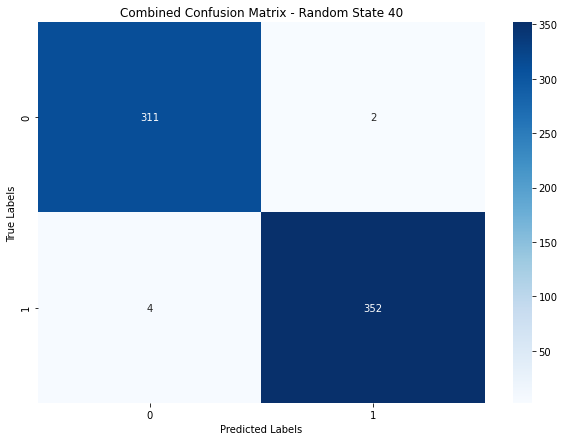

Random State: 50
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:10:57] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:11:32] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:12:07] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:12:43] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:13:20] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 50 - Average Accuracy: 0.9925
Random State 50 - Average Precision: 0.9927
Random State 50 - Average Recall: 0.9925
Random State 50 - Average F1 Score: 0.9925
Random State 50 - Combined Confusion Matrix:
[[312   1]
 [  4 352]]


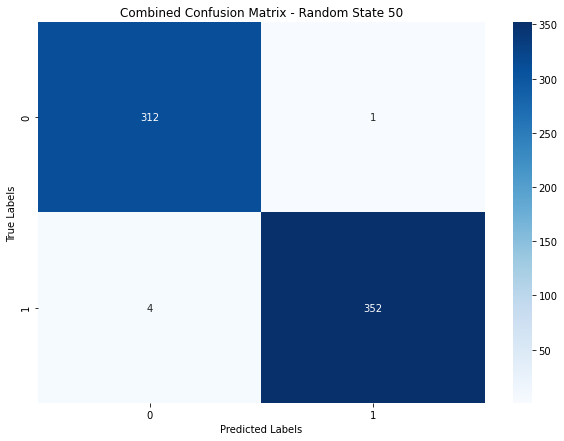

Random State: 60
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:13:55] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:14:30] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:15:06] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:15:41] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:16:17] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 60 - Average Accuracy: 0.9925
Random State 60 - Average Precision: 0.9927
Random State 60 - Average Recall: 0.9925
Random State 60 - Average F1 Score: 0.9925
Random State 60 - Combined Confusion Matrix:
[[312   1]
 [  4 352]]


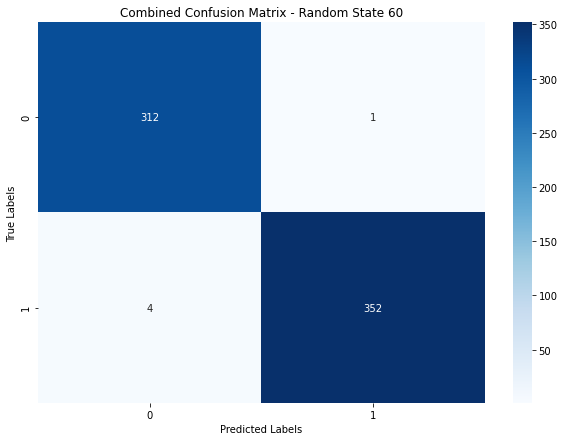

Random State: 70
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:16:52] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:17:28] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:18:03] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:18:38] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:19:13] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 70 - Average Accuracy: 0.9910
Random State 70 - Average Precision: 0.9912
Random State 70 - Average Recall: 0.9910
Random State 70 - Average F1 Score: 0.9910
Random State 70 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


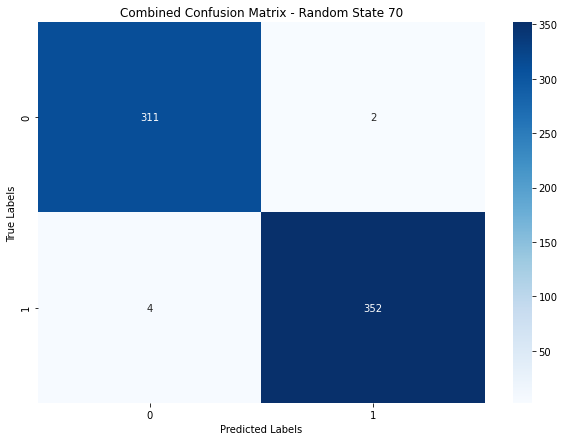

Random State: 80
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:19:48] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:20:24] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:20:59] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:21:34] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:22:09] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 80 - Average Accuracy: 0.9910
Random State 80 - Average Precision: 0.9912
Random State 80 - Average Recall: 0.9910
Random State 80 - Average F1 Score: 0.9910
Random State 80 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


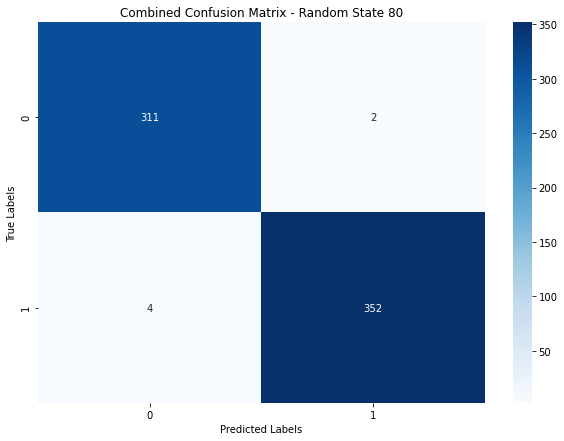

Random State: 90
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:22:44] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:23:19] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:23:54] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:24:29] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:25:04] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 90 - Average Accuracy: 0.9940
Random State 90 - Average Precision: 0.9941
Random State 90 - Average Recall: 0.9940
Random State 90 - Average F1 Score: 0.9940
Random State 90 - Combined Confusion Matrix:
[[312   1]
 [  3 353]]


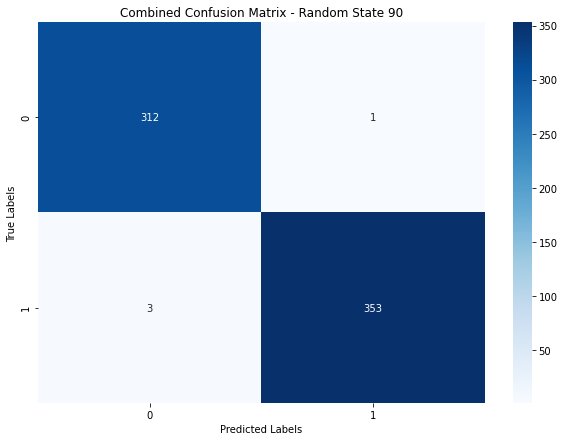

Random State: 100
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:25:39] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:26:14] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:26:48] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:27:24] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:27:59] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 100 - Average Accuracy: 0.9925
Random State 100 - Average Precision: 0.9927
Random State 100 - Average Recall: 0.9925
Random State 100 - Average F1 Score: 0.9925
Random State 100 - Combined Confusion Matrix:
[[312   1]
 [  4 352]]


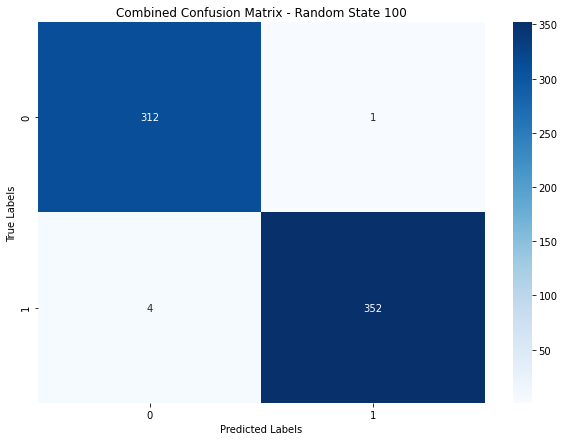

In [65]:
# inclusion of many random states; xgboost; no hp

model_dir = "../models/luad_healthy/"

# Lists to store the scores for each random state
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for random_state in random_states:
    print(f"Random State: {random_state}")

    # Lists to store the scores for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Lists to accumulate true and predicted labels for all folds
    all_true_labels = []
    all_pred_labels = []

    for i in range(1, 6):
        newdftrain = pd.read_csv("../Data/luad_healthy/train_split_" + str(i) + ".csv")
        newdftrain.index = newdftrain["Sample"]
        newdftest = pd.read_csv("../Data/luad_healthy/test_split_" + str(i) + ".csv")
        newdftest.index = newdftest["Sample"]
        X_train, y_train = newdftrain.iloc[:, 0:19648], newdftrain['label'].values
        X_test, y_test = newdftest.iloc[:, 0:19648], newdftest['label'].values
        print(X_train.shape, y_train.shape)
        print(X_test.shape, y_test.shape)

        # XGBoost definition with varying random state
        xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=2,
                    random_state=random_state)
        # Fitting model
        mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
        # Save to JSON
        mcl.save_model(model_dir + f"fold_" + str(i) + f"_model_topology_xgboost_hp_random_state_{random_state}.json")
        # Prediction output
        pred = mcl.predict(X_test)
        # Probability of predicted output
        proba = mcl.predict_proba(X_test)

        # Append true and predicted labels
        all_true_labels.extend(y_test)
        all_pred_labels.extend(pred)

        # Calculate metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='weighted')
        recall = recall_score(y_test, pred, average='weighted')
        f1 = f1_score(y_test, pred, average='weighted')

        # Append scores to the lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print scores for the current fold
        print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        # Store labels for results
        y_map = pd.DataFrame(data=y_test, columns=['class'])
        y_map['pred'] = pred
        y_map['true_label'] = y_map['class'].map({'luad': 1, 'healthy': 0})
        y_map['pred_label'] = y_map['pred'].map({'luad': 1, 'healthy': 0})
        y_map.index = X_test.index

        # Adding true and predicted label to X_test
        X_test['true_label'] = y_map['true_label']
        X_test['predicted_label'] = y_map['pred_label']

        # Drop false predictions
        X_test = drop_false_pred(X_test)
        X_test.to_csv(f"../Output/luad_healthy/AfterDroppingFalsePrediction_test_{i}_xgboost_hp_random_state_{random_state}.csv")

        # New y_map
        y_map_new = y_map[y_map.index.isin(X_test.index.tolist())]
        y_map_new.to_csv(f"../Output/luad_healthy/true_predicted_label_test_{i}_xgboost_hp_random_state_{random_state}.csv")

    # Calculate average scores
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print average scores
    print(f"Random State {random_state} - Average Accuracy: {avg_accuracy:.4f}")
    print(f"Random State {random_state} - Average Precision: {avg_precision:.4f}")
    print(f"Random State {random_state} - Average Recall: {avg_recall:.4f}")
    print(f"Random State {random_state} - Average F1 Score: {avg_f1:.4f}")

    # Calculate combined confusion matrix
    combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
    print(f"Random State {random_state} - Combined Confusion Matrix:")
    print(combined_cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Combined Confusion Matrix - Random State {random_state}')
    plt.show()

In [44]:
# CNN
# convert to 2D model function

def convert_2d(df):
    np_array = df.values
    # pixel length
    pixel_length = math.ceil(math.sqrt(df.shape[1]))
    print(pixel_length)
    
    #padding
    pad_length = pixel_length ** 2 - df.shape[1]
    print(pad_length)
    
    np_array_padded = np.pad(np_array, ((0, 0), (0, pad_length)), mode="constant")
    print(np_array_padded)
    
    #reshaping
    np_array_2d = np.reshape(
        np_array_padded, (np_array_padded.shape[0], pixel_length, pixel_length)
    )
    print(np_array_2d.shape)
    np_array_2d_1 = np.expand_dims(np_array_2d, axis=3)
    print(np_array_2d_1.shape)
    return np_array_2d_1

#one hot encoding for labels

def convert_onehot(df_labels):
    np_labels = np.array(df_labels)
    print(np_labels)
    encoder = LabelBinarizer()
    print(encoder)
    np_labels_onehot = encoder.fit_transform(np_labels)
    return np_labels_onehot


# best model
# round 5
# CNN model

def keras_cnn(X, y, loss_func="categorical_crossentropy"):
    model = Sequential()

    model.add(
        Conv2D(32, (3, 3), input_shape=(X.shape[1], X.shape[2], 1), padding="same")
    )
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    

    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))

    model.add(Conv2D(256, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.2))

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))

    model.add(Dense(y.shape[1]))
    model.add(Activation("softmax"))

    model.compile(
        loss=loss_func,
#         optimizer=RMSprop(lr=0.01, rho=0.9, decay=0.01),
        optimizer=RMSprop(lr=0.01,decay=0.02),
        metrics=["accuracy"],
    )

    return model

# dropping the samples that did not predict correctly
def drop_false_pred(df):
    #df = df[df.predicted_label == df.true_label].copy()
    df = df[df.predicted_label.astype(int) == df.true_label.astype(int)].copy()
    df.drop(["predicted_label","true_label"], axis=1, inplace=True),
    return df

model_dir= "../models/luad_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []


for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
    #     newdftrain=newdftrain.drop(["Unnamed: 0"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    
    # CNN model
    X_train_converted = convert_2d(X_train)
    # print(X_train_converted.shape)
    
    y_train_converted = convert_onehot(y_train)
    # print(y_train_converted.shape)
    
    model = keras_cnn(X_train_converted, y_train_converted)
    print("Model Initiated. Run_"+ str(i))
    
    # Train model beautifully
    model.fit(
        X_train_converted, 
        y_train_converted, 
        batch_size=32, 
        epochs=30,
        #epochs=2,
        verbose=1,
        validation_split=0.2, 
    ) 
    
    from keras.models import model_from_json

    # Save model JSON and weights
#     model_dir="../model/"
    model_json = model.to_json()
    with open(model_dir+"CNN_model_bestModel_test_"+str(i)+"_CNN.json", "w") as json_file:
        json_file.write(model_json)

    model.save_weights(model_dir+"CNN_model_bestModel_model_weights_test_"+str(i)+".hdf5")
    
    # X test values
    X_test_copy= X_test
    X_test = convert_2d(X_test)
    lb = LabelBinarizer()
    lb.fit(y_test)
    
    
    # Run predictions and add everything to a giant DataFrame
#     y_preds = model.predict_classes(
#         X_test
#     )
    y_preds= np.argmax(model.predict(X_test),axis=1)
    num_preds = len(y_preds)
    #print(num_preds)

    #classes = df["target"].unique()
    classes = np.unique(y_test)
    num_classes = len(classes)
    #print(num_classes)
    
    #true label and pred label mapping
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= y_preds
    y_map['pred']=y_map['pred'].map({0: 'healthy',1: 'luad',2:'lusc'})
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test_copy.index
    
    
    # adding true and predicted label to X_test
    X_test_copy['true_label']= y_map['true_label']
    X_test_copy['predicted_label']= y_map['pred_label']

    # drop false prediction
    X_test_copy=drop_false_pred(X_test_copy)
#     X_test_copy.to_csv("../Output/Output_CNN/CNN_AfterDroppingFalsePrediction_test_"+str(i)+".csv")
                       
    # new y_map
    #y_map_new= pd.DataFrame()
    y_map_new= y_map[y_map.index.isin(X_test_copy.index.tolist())]
#     y_map_new.to_csv("../Output/Output_CNN/CNN_true_predicted_label_test_"+str(i)+".csv")

    # F1 score and accuracy
    y_preds_onehot = np.zeros([num_preds, num_classes])
    y_preds_onehot[np.arange(num_preds), y_preds] = 1
    y_preds_labels = lb.inverse_transform(y_preds_onehot)

    print(f"macro-average F1 : {f1_score(y_test, y_preds_labels, average='macro')}")
    conf_mat = confusion_matrix(y_preds_labels, y_test)
    acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
    print('Overall accuracy: {} %'.format(acc*100))

                       
                       

(535, 19648) (535,)
(134, 19648) (134,)
141
233
[[  44.89  172.65  414.87 ...    0.      0.      0.  ]
 [  41.52  166.73 1030.12 ...    0.      0.      0.  ]
 [  34.02  111.99  186.4  ...    0.      0.      0.  ]
 ...
 [  18.84  138.1   403.5  ...    0.      0.      0.  ]
 [ 105.15  117.6  2915.45 ...    0.      0.      0.  ]
 [ 148.09  108.14  503.95 ...    0.      0.      0.  ]]
(535, 141, 141)
(535, 141, 141, 1)
['luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad' 'luad'
 'luad' 'luad

The `lr` argument is deprecated, use `learning_rate` instead.


14/14 [==============================] - 4s 180ms/step - loss: 0.0000e+00 - accuracy: 0.6636 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6636 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6636 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.6636 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
14/14 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6636 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6636 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - 

Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


14/14 [==============================] - 4s 147ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
14/14 [==============================] - 2s 127ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - 

Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


14/14 [==============================] - 4s 147ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
14/14 [==============================] - 2s 127ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - 

Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


14/14 [==============================] - 3s 145ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - 

Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


14/14 [==============================] - 3s 147ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
14/14 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6659 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - 

(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Average Accuracy: 0.9910
Average Precision: 0.9912
Average Recall: 0.9910
Average F1 Score: 0.9910
Combined Confusion Matrix:
[[311   2]
 [  4 352]]


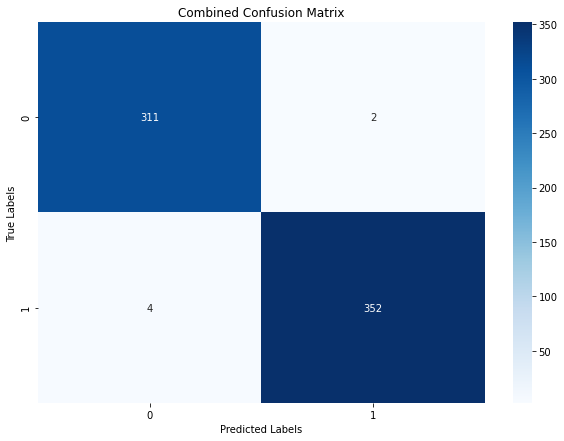

In [27]:
#XGBoost no HP

model_dir= "../models/luad_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # xgboost definition
    xgbc = xgb.XGBClassifier(random_state=42)
    #fitting model
    mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
    # save to JSON
    mcl.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_xgboost_nohp.json")
    # prediction output
    pred = mcl.predict(X_test)
    # probability of predicted output
    proba = mcl.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_xgboost_nohp.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_healthy/true_predicted_label_test_"+str(i)+"_xgboost_nohp.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()


Random State: 10
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 10 - Average Accuracy: 0.9910
Random State 10 - Average Precision: 0.9912
Random State 10 - Average Recall: 0.9910
Random State 10 - Average F1 Score: 0.9910
Random State 10 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


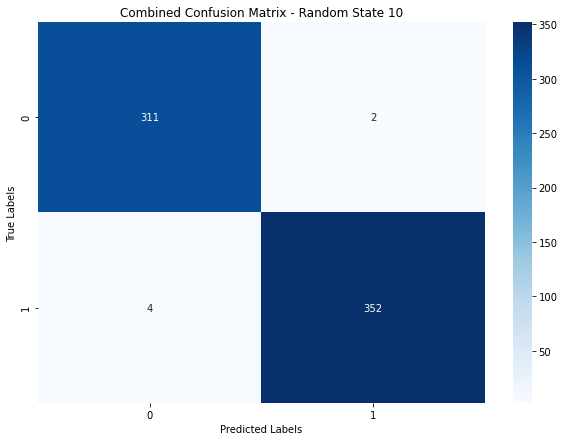

Random State: 20
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 20 - Average Accuracy: 0.9910
Random State 20 - Average Precision: 0.9912
Random State 20 - Average Recall: 0.9910
Random State 20 - Average F1 Score: 0.9910
Random State 20 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


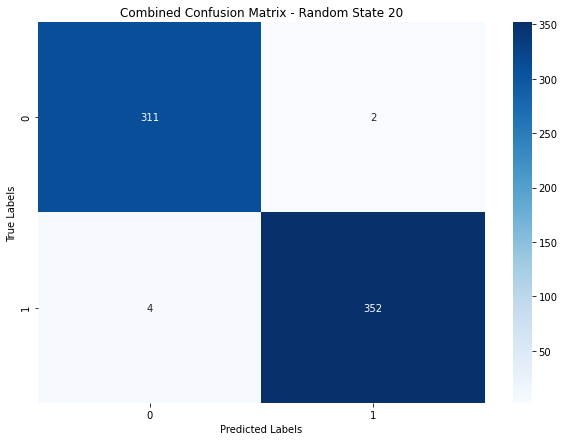

Random State: 30
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 30 - Average Accuracy: 0.9910
Random State 30 - Average Precision: 0.9912
Random State 30 - Average Recall: 0.9910
Random State 30 - Average F1 Score: 0.9910
Random State 30 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


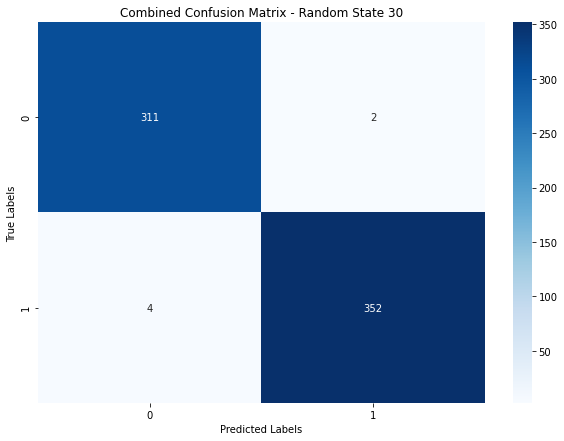

Random State: 40
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 40 - Average Accuracy: 0.9910
Random State 40 - Average Precision: 0.9912
Random State 40 - Average Recall: 0.9910
Random State 40 - Average F1 Score: 0.9910
Random State 40 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


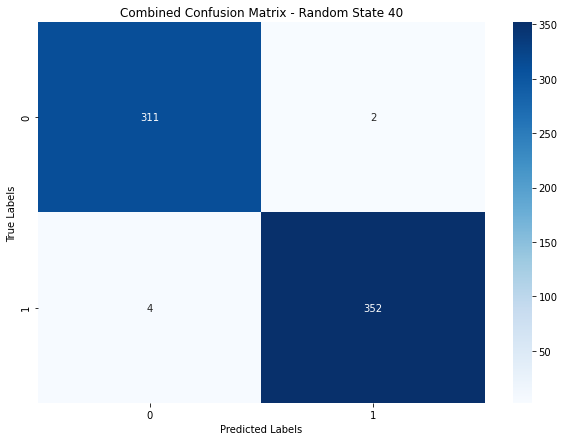

Random State: 50
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 50 - Average Accuracy: 0.9910
Random State 50 - Average Precision: 0.9912
Random State 50 - Average Recall: 0.9910
Random State 50 - Average F1 Score: 0.9910
Random State 50 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


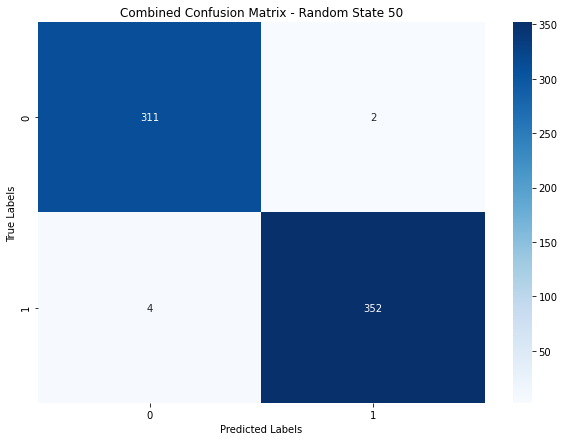

Random State: 60
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 60 - Average Accuracy: 0.9910
Random State 60 - Average Precision: 0.9912
Random State 60 - Average Recall: 0.9910
Random State 60 - Average F1 Score: 0.9910
Random State 60 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


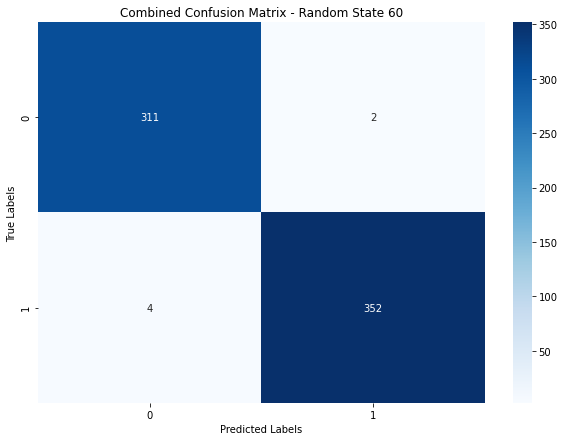

Random State: 70
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 70 - Average Accuracy: 0.9910
Random State 70 - Average Precision: 0.9912
Random State 70 - Average Recall: 0.9910
Random State 70 - Average F1 Score: 0.9910
Random State 70 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


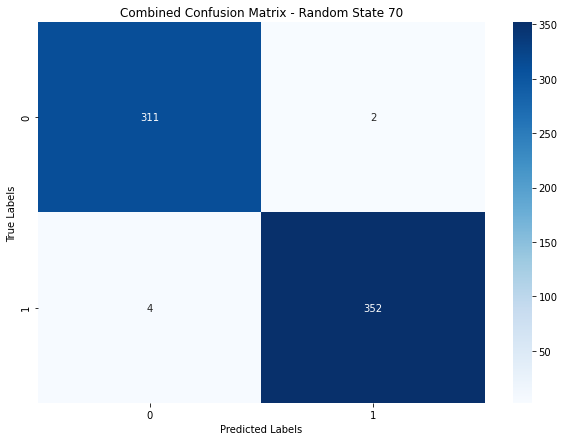

Random State: 80
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 80 - Average Accuracy: 0.9910
Random State 80 - Average Precision: 0.9912
Random State 80 - Average Recall: 0.9910
Random State 80 - Average F1 Score: 0.9910
Random State 80 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


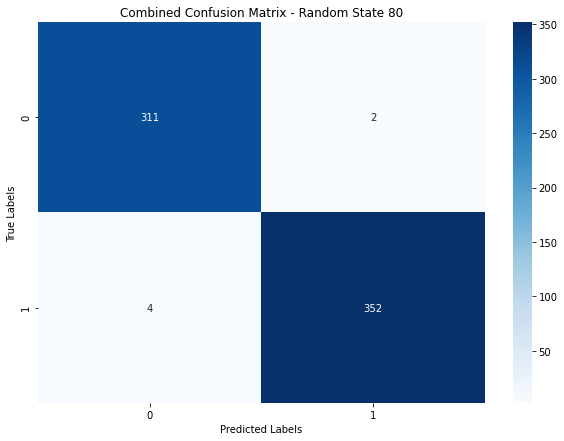

Random State: 90
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 90 - Average Accuracy: 0.9910
Random State 90 - Average Precision: 0.9912
Random State 90 - Average Recall: 0.9910
Random State 90 - Average F1 Score: 0.9910
Random State 90 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


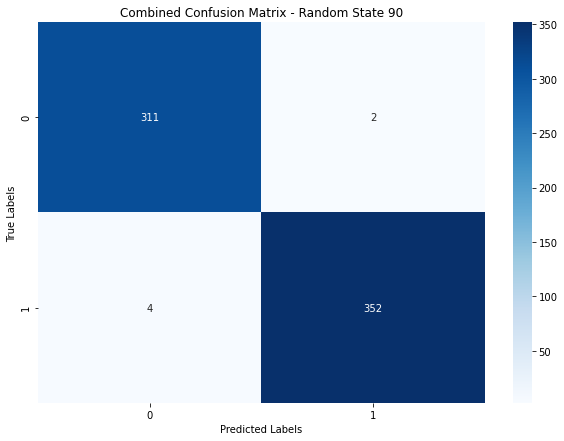

Random State: 100
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
Random State 100 - Average Accuracy: 0.9910
Random State 100 - Average Precision: 0.9912
Random State 100 - Average Recall: 0.9910
Random State 100 - Average F1 Score: 0.9910
Random State 100 - Combined Confusion Matrix:
[[311   2]
 [  4 352]]


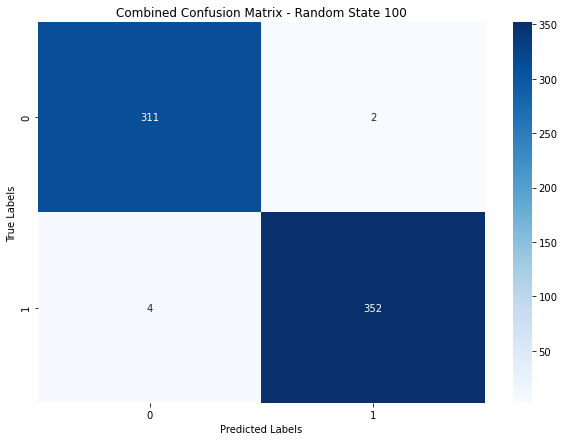

In [55]:
# inclusion of many random states; xgboost; no hp

model_dir = "../models/luad_healthy/"

# Lists to store the scores for each random state
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for random_state in random_states:
    print(f"Random State: {random_state}")

    # Lists to store the scores for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Lists to accumulate true and predicted labels for all folds
    all_true_labels = []
    all_pred_labels = []

    for i in range(1, 6):
        newdftrain = pd.read_csv("../Data/luad_healthy/train_split_" + str(i) + ".csv")
        newdftrain.index = newdftrain["Sample"]
        newdftest = pd.read_csv("../Data/luad_healthy/test_split_" + str(i) + ".csv")
        newdftest.index = newdftest["Sample"]
        X_train, y_train = newdftrain.iloc[:, 0:19648], newdftrain['label'].values
        X_test, y_test = newdftest.iloc[:, 0:19648], newdftest['label'].values
        print(X_train.shape, y_train.shape)
        print(X_test.shape, y_test.shape)

        # XGBoost definition with varying random state
        xgbc = xgb.XGBClassifier(random_state=random_state)
        # Fitting model
        mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
        # Save to JSON
        mcl.save_model(model_dir + f"fold_" + str(i) + f"_model_topology_xgboost_nohp_random_state_{random_state}.json")
        # Prediction output
        pred = mcl.predict(X_test)
        # Probability of predicted output
        proba = mcl.predict_proba(X_test)

        # Append true and predicted labels
        all_true_labels.extend(y_test)
        all_pred_labels.extend(pred)

        # Calculate metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='weighted')
        recall = recall_score(y_test, pred, average='weighted')
        f1 = f1_score(y_test, pred, average='weighted')

        # Append scores to the lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print scores for the current fold
        print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        # Store labels for results
        y_map = pd.DataFrame(data=y_test, columns=['class'])
        y_map['pred'] = pred
        y_map['true_label'] = y_map['class'].map({'luad': 1, 'healthy': 0})
        y_map['pred_label'] = y_map['pred'].map({'luad': 1, 'healthy': 0})
        y_map.index = X_test.index

        # Adding true and predicted label to X_test
        X_test['true_label'] = y_map['true_label']
        X_test['predicted_label'] = y_map['pred_label']

        # Drop false predictions
        X_test = drop_false_pred(X_test)
        X_test.to_csv(f"../Output/luad_healthy/AfterDroppingFalsePrediction_test_{i}_xgboost_nohp_random_state_{random_state}.csv")

        # New y_map
        y_map_new = y_map[y_map.index.isin(X_test.index.tolist())]
        y_map_new.to_csv(f"../Output/luad_healthy/true_predicted_label_test_{i}_xgboost_nohp_random_state_{random_state}.csv")

    # Calculate average scores
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print average scores
    print(f"Random State {random_state} - Average Accuracy: {avg_accuracy:.4f}")
    print(f"Random State {random_state} - Average Precision: {avg_precision:.4f}")
    print(f"Random State {random_state} - Average Recall: {avg_recall:.4f}")
    print(f"Random State {random_state} - Average F1 Score: {avg_f1:.4f}")

    # Calculate combined confusion matrix
    combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
    print(f"Random State {random_state} - Combined Confusion Matrix:")
    print(combined_cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Combined Confusion Matrix - Random State {random_state}')
    plt.show()

(535, 19648) (535,)
(134, 19648) (134,)
Fold 1 - Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)
Fold 2 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(535, 19648) (535,)
(134, 19648) (134,)
Fold 3 - Accuracy: 0.9925, Precision: 0.9927, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)
Fold 4 - Accuracy: 0.9851, Precision: 0.9855, Recall: 0.9851, F1 Score: 0.9851
(536, 19648) (536,)
(133, 19648) (133,)
Fold 5 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Average Accuracy: 0.9896
Average Precision: 0.9898
Average Recall: 0.9896
Average F1 Score: 0.9896
Combined Confusion Matrix:
[[312   1]
 [  6 350]]


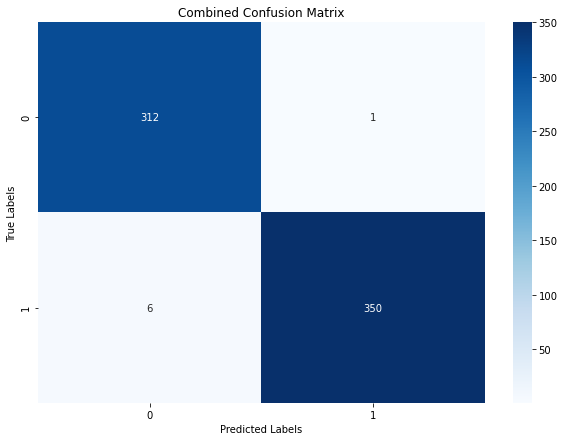

In [28]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# RF

model_dir= "../models/luad_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Random Forest definition
    rf = RandomForestClassifier()
    # fitting model
    rf.fit(X_train, y_train)

    # Save the model
    joblib.dump(rf, model_dir + f"fold_" + str(i) + "_model_topology_rf.pkl")
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")
    # prediction output
    pred = rf.predict(X_test)
    # probability of predicted output
    proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_rf.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_healthy/true_predicted_label_test_"+str(i)+"_rf.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(535, 19648) (535,)
(134, 19648) (134,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 1 - Accuracy: 0.5373, Precision: 0.2887, Recall: 0.5373, F1 Score: 0.3756
(535, 19648) (535,)
(134, 19648) (134,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 2 - Accuracy: 0.5299, Precision: 0.2807, Recall: 0.5299, F1 Score: 0.3670
(535, 19648) (535,)
(134, 19648) (134,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 3 - Accuracy: 0.5299, Precision: 0.2807, Recall: 0.5299, F1 Score: 0.3670
(535, 19648) (535,)
(134, 19648) (134,)
Fold 4 - Accuracy: 0.7985, Precision: 0.8540, Recall: 0.7985, F1 Score: 0.7871
(536, 19648) (536,)
(133, 19648) (133,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 5 - Accuracy: 0.5338, Precision: 0.2850, Recall: 0.5338, F1 Score: 0.3716
Average Accuracy: 0.5859
Average Precision: 0.3978
Average Recall: 0.5859
Average F1 Score: 0.4537
Combined Confusion Matrix:
[[ 36 277]
 [  0 356]]


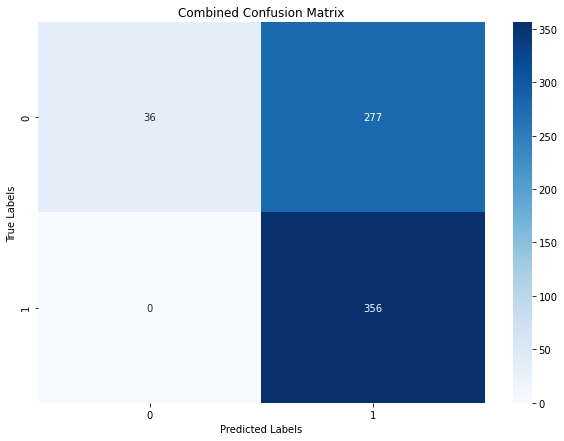

In [29]:
from sklearn.svm import SVC


model_dir= "../models/luad_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # SVM definition with default hyperparameters
    svm = SVC(probability=True, random_state=42)
    # fitting model
    svm.fit(X_train, y_train)
    
    # prediction output
    pred = svm.predict(X_test)

    # Save the model
    joblib.dump(svm, model_dir + f"fold_" + str(i) + "_model_topology_svm.pkl")
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_svm.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_healthy/true_predicted_label_test_"+str(i)+"_svm.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(535, 19648) (535,)
(134, 19648) (134,)
Fold 1 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
(535, 19648) (535,)
(134, 19648) (134,)
Fold 2 - Accuracy: 0.9776, Precision: 0.9777, Recall: 0.9776, F1 Score: 0.9776
(535, 19648) (535,)
(134, 19648) (134,)
Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(535, 19648) (535,)
(134, 19648) (134,)
Fold 4 - Accuracy: 0.9925, Precision: 0.9926, Recall: 0.9925, F1 Score: 0.9925
(536, 19648) (536,)
(133, 19648) (133,)
Fold 5 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Average Accuracy: 0.9925
Average Precision: 0.9926
Average Recall: 0.9925
Average F1 Score: 0.9925
Combined Confusion Matrix:
[[309   4]
 [  1 355]]


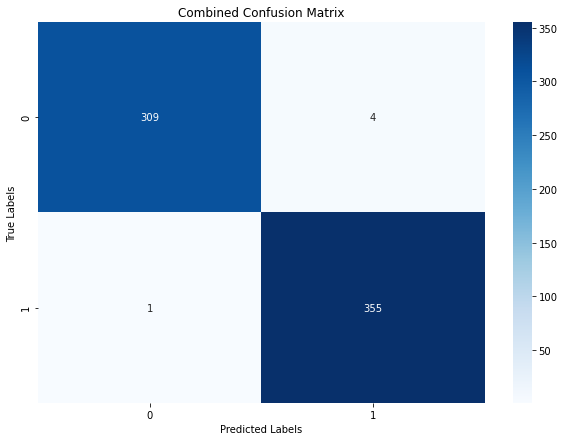

In [30]:
from sklearn.linear_model import LogisticRegression

model_dir= "../models/luad_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Logistic Regression definition with default hyperparameters
    lr = LogisticRegression(random_state=42)
    # fitting model
    lr.fit(X_train, y_train)
    
    # Save the model
    joblib.dump(lr, model_dir + f"fold_" + str(i) + "_model_topology_lr.pkl")
    
    # prediction output
    pred = lr.predict(X_test)
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_lr.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_healthy/true_predicted_label_test_"+str(i)+"_lr.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(535, 19648) (535,)
(134, 19648) (134,)
Fold 1 - Accuracy: 0.6940, Precision: 0.8050, Recall: 0.6940, F1 Score: 0.6524
(535, 19648) (535,)
(134, 19648) (134,)
Fold 2 - Accuracy: 0.6866, Precision: 0.8031, Recall: 0.6866, F1 Score: 0.6440
(535, 19648) (535,)
(134, 19648) (134,)
Fold 3 - Accuracy: 0.7239, Precision: 0.8185, Recall: 0.7239, F1 Score: 0.6950
(535, 19648) (535,)
(134, 19648) (134,)
Fold 4 - Accuracy: 0.9478, Precision: 0.9478, Recall: 0.9478, F1 Score: 0.9477
(536, 19648) (536,)
(133, 19648) (133,)
Fold 5 - Accuracy: 0.7368, Precision: 0.8237, Recall: 0.7368, F1 Score: 0.7111
Average Accuracy: 0.7578
Average Precision: 0.8396
Average Recall: 0.7578
Average F1 Score: 0.7300
Combined Confusion Matrix:
[[154 159]
 [  3 353]]


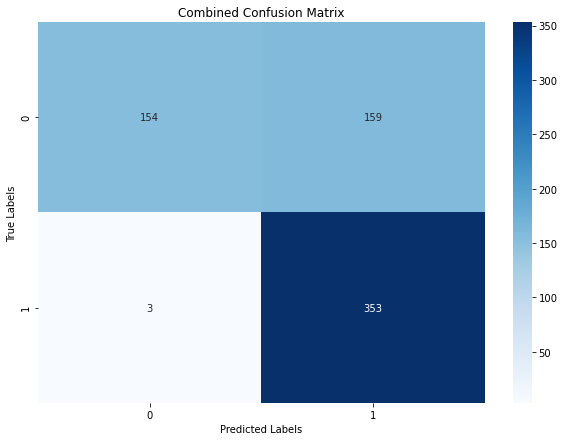

In [31]:
from sklearn.naive_bayes import GaussianNB

model_dir= "../models/luad_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/luad_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/luad_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Naive Bayes definition with default hyperparameters
    nb = GaussianNB()
    # fitting model
    nb.fit(X_train, y_train)
    
    # Save the model
    joblib.dump(nb, model_dir + f"fold_" + str(i) + "_model_topology_nb.pkl")
    
    # prediction output
    pred = nb.predict(X_test)
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/luad_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_nb.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/luad_healthy/true_predicted_label_test_"+str(i)+"_nb.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

# LUSC Healthy

(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:07:05] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:07:38] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:08:10] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:08:41] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:09:13] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Average Accuracy: 0.9951
Average Precision: 0.9951
Average Recall: 0.9951
Average F1 Score: 0.9951
Combined Confusion Matrix:
[[312   1]
 [  2 293]]


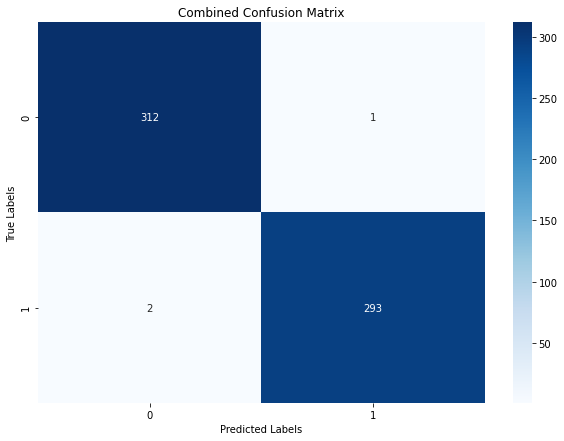

In [13]:
model_dir= "../models/lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # xgboost definition
    xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=2,
                    random_state=42)
    #fitting model
    mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
    # save to JSON
    mcl.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_xgboost.json")
    # prediction output
    pred = mcl.predict(X_test)
    # probability of predicted output
    proba = mcl.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_xgboost.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/lusc_healthy/true_predicted_label_test_"+str(i)+"_xgboost.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

Random State: 10
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:28:34] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:29:05] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:29:37] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:30:06] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:30:37] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 10 - Average Accuracy: 0.9951
Random State 10 - Average Precision: 0.9951
Random State 10 - Average Recall: 0.9951
Random State 10 - Average F1 Score: 0.9951
Random State 10 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


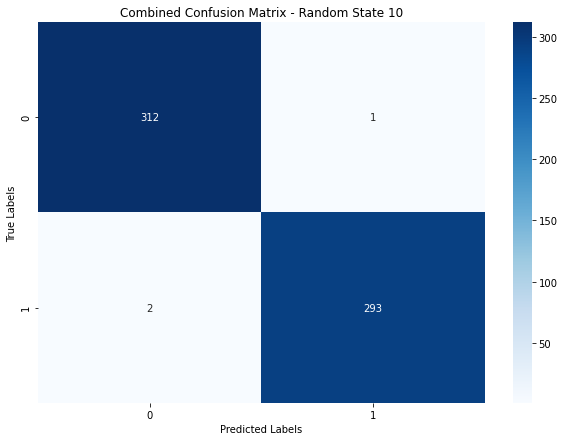

Random State: 20
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:31:09] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:31:40] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:32:11] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:32:41] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:33:13] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 20 - Average Accuracy: 0.9951
Random State 20 - Average Precision: 0.9951
Random State 20 - Average Recall: 0.9951
Random State 20 - Average F1 Score: 0.9951
Random State 20 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


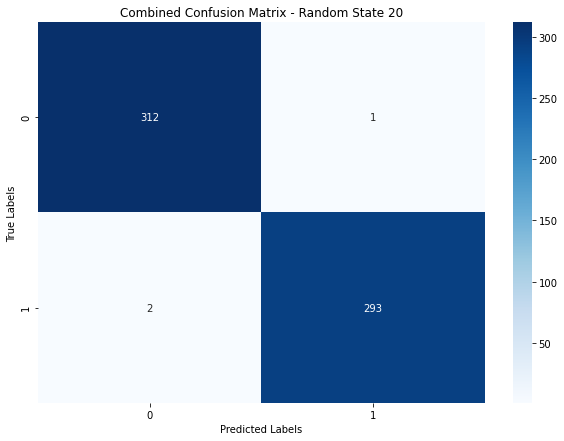

Random State: 30
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:33:44] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:34:15] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:34:47] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:35:17] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:35:48] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 30 - Average Accuracy: 0.9951
Random State 30 - Average Precision: 0.9951
Random State 30 - Average Recall: 0.9951
Random State 30 - Average F1 Score: 0.9951
Random State 30 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


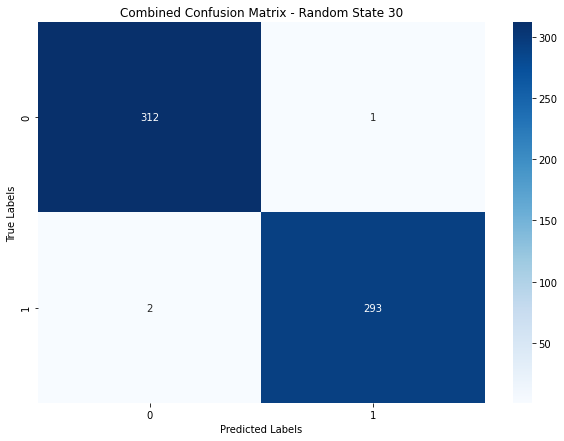

Random State: 40
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:36:19] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:36:50] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:37:23] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:37:52] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:38:23] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 40 - Average Accuracy: 0.9951
Random State 40 - Average Precision: 0.9951
Random State 40 - Average Recall: 0.9951
Random State 40 - Average F1 Score: 0.9951
Random State 40 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


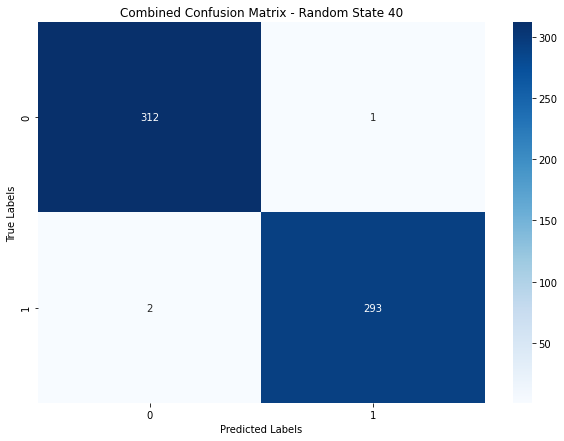

Random State: 50
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:38:54] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:39:25] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:39:57] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:40:27] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:40:58] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 50 - Average Accuracy: 0.9951
Random State 50 - Average Precision: 0.9951
Random State 50 - Average Recall: 0.9951
Random State 50 - Average F1 Score: 0.9951
Random State 50 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


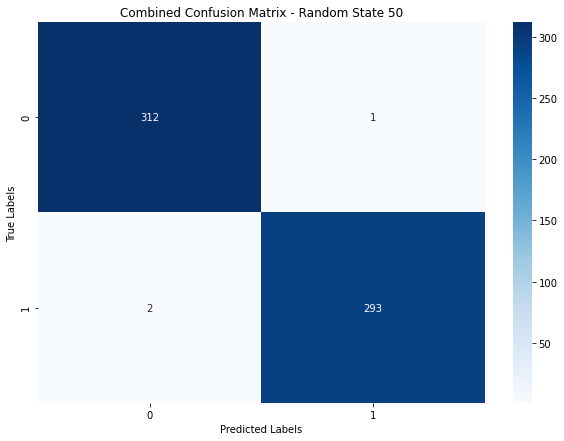

Random State: 60
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:41:29] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:42:00] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:42:32] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:43:01] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:43:32] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 60 - Average Accuracy: 0.9951
Random State 60 - Average Precision: 0.9951
Random State 60 - Average Recall: 0.9951
Random State 60 - Average F1 Score: 0.9951
Random State 60 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


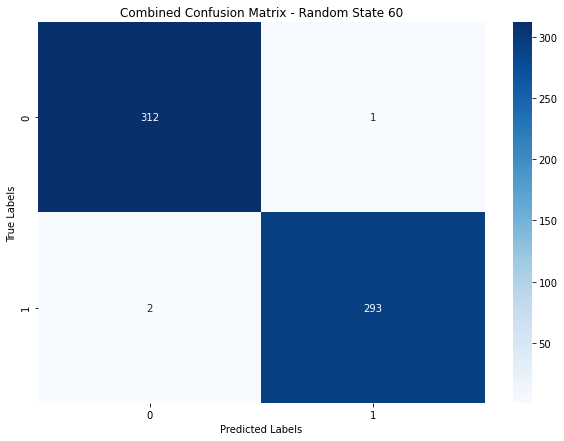

Random State: 70
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:44:03] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:44:34] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:45:06] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:45:35] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:46:06] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 70 - Average Accuracy: 0.9951
Random State 70 - Average Precision: 0.9951
Random State 70 - Average Recall: 0.9951
Random State 70 - Average F1 Score: 0.9951
Random State 70 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


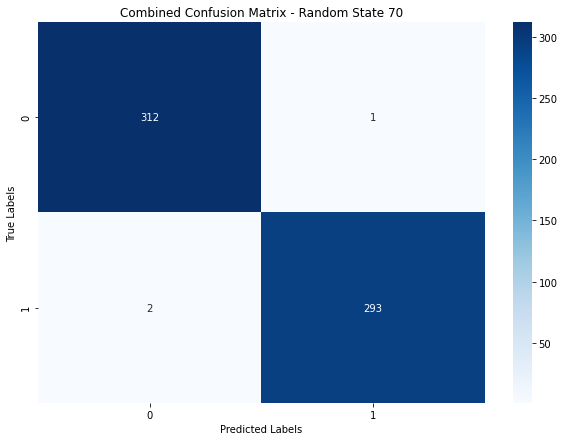

Random State: 80
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:46:37] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:47:09] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:47:41] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:48:10] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:48:41] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 80 - Average Accuracy: 0.9951
Random State 80 - Average Precision: 0.9951
Random State 80 - Average Recall: 0.9951
Random State 80 - Average F1 Score: 0.9951
Random State 80 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


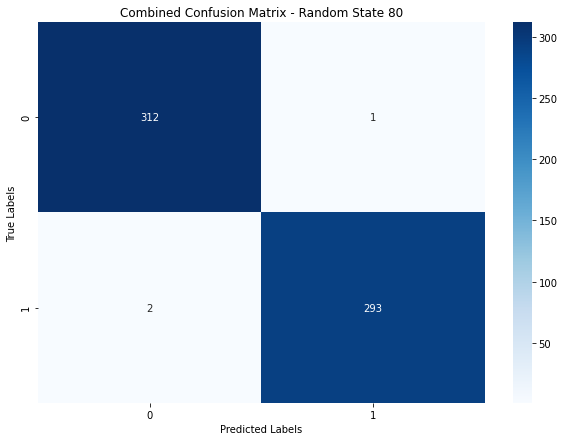

Random State: 90
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:49:12] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:49:44] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:50:16] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:50:45] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:51:17] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 90 - Average Accuracy: 0.9951
Random State 90 - Average Precision: 0.9951
Random State 90 - Average Recall: 0.9951
Random State 90 - Average F1 Score: 0.9951
Random State 90 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


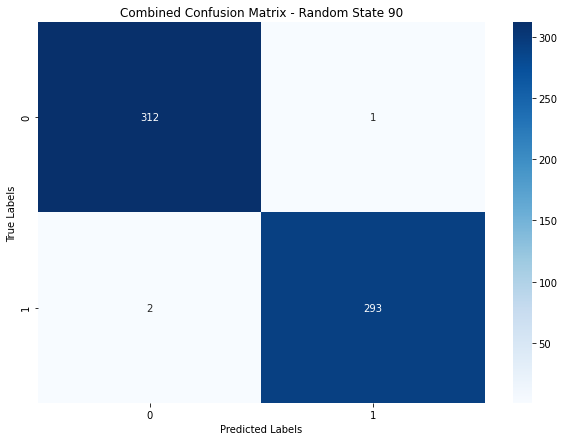

Random State: 100
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:51:48] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:52:19] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:52:50] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:53:20] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[02:53:51] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 100 - Average Accuracy: 0.9951
Random State 100 - Average Precision: 0.9951
Random State 100 - Average Recall: 0.9951
Random State 100 - Average F1 Score: 0.9951
Random State 100 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


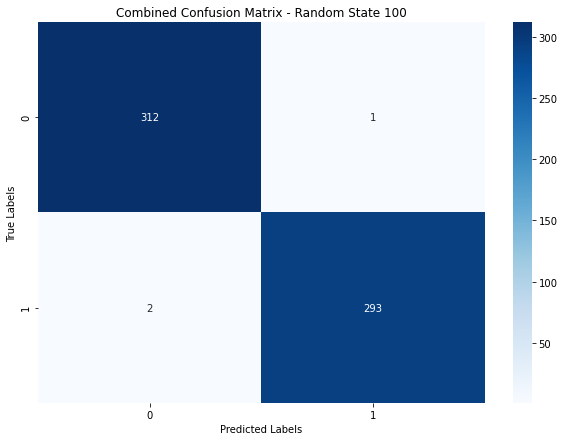

In [66]:
# inclusion of many random states; xgboost; no hp

model_dir = "../models/lusc_healthy/"

# Lists to store the scores for each random state
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for random_state in random_states:
    print(f"Random State: {random_state}")

    # Lists to store the scores for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Lists to accumulate true and predicted labels for all folds
    all_true_labels = []
    all_pred_labels = []

    for i in range(1, 6):
        newdftrain = pd.read_csv("../Data/lusc_healthy/train_split_" + str(i) + ".csv")
        newdftrain.index = newdftrain["Sample"]
        newdftest = pd.read_csv("../Data/lusc_healthy/test_split_" + str(i) + ".csv")
        newdftest.index = newdftest["Sample"]
        X_train, y_train = newdftrain.iloc[:, 0:19648], newdftrain['label'].values
        X_test, y_test = newdftest.iloc[:, 0:19648], newdftest['label'].values
        print(X_train.shape, y_train.shape)
        print(X_test.shape, y_test.shape)

        # XGBoost definition with varying random state
        xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=2,
                    random_state=random_state)
        # Fitting model
        mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
        # Save to JSON
        mcl.save_model(model_dir + f"fold_" + str(i) + f"_model_topology_xgboost_hp_random_state_{random_state}.json")
        # Prediction output
        pred = mcl.predict(X_test)
        # Probability of predicted output
        proba = mcl.predict_proba(X_test)

        # Append true and predicted labels
        all_true_labels.extend(y_test)
        all_pred_labels.extend(pred)

        # Calculate metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='weighted')
        recall = recall_score(y_test, pred, average='weighted')
        f1 = f1_score(y_test, pred, average='weighted')

        # Append scores to the lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print scores for the current fold
        print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        # Store labels for results
        y_map = pd.DataFrame(data=y_test, columns=['class'])
        y_map['pred'] = pred
        y_map['true_label'] = y_map['class'].map({'lusc': 1, 'healthy': 0})
        y_map['pred_label'] = y_map['pred'].map({'lusc': 1, 'healthy': 0})
        y_map.index = X_test.index

        # Adding true and predicted label to X_test
        X_test['true_label'] = y_map['true_label']
        X_test['predicted_label'] = y_map['pred_label']

        # Drop false predictions
        X_test = drop_false_pred(X_test)
        X_test.to_csv(f"../Output/lusc_healthy/AfterDroppingFalsePrediction_test_{i}_xgboost_hp_random_state_{random_state}.csv")

        # New y_map
        y_map_new = y_map[y_map.index.isin(X_test.index.tolist())]
        y_map_new.to_csv(f"../Output/lusc_healthy/true_predicted_label_test_{i}_xgboost_hp_random_state_{random_state}.csv")

    # Calculate average scores
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print average scores
    print(f"Random State {random_state} - Average Accuracy: {avg_accuracy:.4f}")
    print(f"Random State {random_state} - Average Precision: {avg_precision:.4f}")
    print(f"Random State {random_state} - Average Recall: {avg_recall:.4f}")
    print(f"Random State {random_state} - Average F1 Score: {avg_f1:.4f}")

    # Calculate combined confusion matrix
    combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
    print(f"Random State {random_state} - Combined Confusion Matrix:")
    print(combined_cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Combined Confusion Matrix - Random State {random_state}')
    plt.show()

In [45]:
# CNN
# convert to 2D model function

def convert_2d(df):
    np_array = df.values
    # pixel length
    pixel_length = math.ceil(math.sqrt(df.shape[1]))
    print(pixel_length)
    
    #padding
    pad_length = pixel_length ** 2 - df.shape[1]
    print(pad_length)
    
    np_array_padded = np.pad(np_array, ((0, 0), (0, pad_length)), mode="constant")
    print(np_array_padded)
    
    #reshaping
    np_array_2d = np.reshape(
        np_array_padded, (np_array_padded.shape[0], pixel_length, pixel_length)
    )
    print(np_array_2d.shape)
    np_array_2d_1 = np.expand_dims(np_array_2d, axis=3)
    print(np_array_2d_1.shape)
    return np_array_2d_1

#one hot encoding for labels

def convert_onehot(df_labels):
    np_labels = np.array(df_labels)
    print(np_labels)
    encoder = LabelBinarizer()
    print(encoder)
    np_labels_onehot = encoder.fit_transform(np_labels)
    return np_labels_onehot


# best model
# round 5
# CNN model

def keras_cnn(X, y, loss_func="categorical_crossentropy"):
    model = Sequential()

    model.add(
        Conv2D(32, (3, 3), input_shape=(X.shape[1], X.shape[2], 1), padding="same")
    )
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    

    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))

    model.add(Conv2D(256, (3, 3), padding="same"))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.2))

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))

    model.add(Dense(y.shape[1]))
    model.add(Activation("softmax"))

    model.compile(
        loss=loss_func,
#         optimizer=RMSprop(lr=0.01, rho=0.9, decay=0.01),
        optimizer=RMSprop(lr=0.01,decay=0.02),
        metrics=["accuracy"],
    )

    return model

# dropping the samples that did not predict correctly
def drop_false_pred(df):
    #df = df[df.predicted_label == df.true_label].copy()
    df = df[df.predicted_label.astype(int) == df.true_label.astype(int)].copy()
    df.drop(["predicted_label","true_label"], axis=1, inplace=True),
    return df

model_dir= "../models/lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []


for i in range(1,6):
    newdftrain= pd.read_csv("../Data/lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
    #     newdftrain=newdftrain.drop(["Unnamed: 0"], axis="columns")
    newdftest= pd.read_csv("../Data/lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    
    # CNN model
    X_train_converted = convert_2d(X_train)
    # print(X_train_converted.shape)
    
    y_train_converted = convert_onehot(y_train)
    # print(y_train_converted.shape)
    
    model = keras_cnn(X_train_converted, y_train_converted)
    print("Model Initiated. Run_"+ str(i))
    
    # Train model beautifully
    model.fit(
        X_train_converted, 
        y_train_converted, 
        batch_size=32, 
        epochs=30,
        #epochs=2,
        verbose=1,
        validation_split=0.2, 
    ) 
    
    from keras.models import model_from_json

    # Save model JSON and weights
#     model_dir="../model/"
    model_json = model.to_json()
    with open(model_dir+"CNN_model_bestModel_test_"+str(i)+"_CNN.json", "w") as json_file:
        json_file.write(model_json)

    model.save_weights(model_dir+"CNN_model_bestModel_model_weights_test_"+str(i)+".hdf5")
    
    # X test values
    X_test_copy= X_test
    X_test = convert_2d(X_test)
    lb = LabelBinarizer()
    lb.fit(y_test)
    
    
    # Run predictions and add everything to a giant DataFrame
#     y_preds = model.predict_classes(
#         X_test
#     )
    y_preds= np.argmax(model.predict(X_test),axis=1)
    num_preds = len(y_preds)
    #print(num_preds)

    #classes = df["target"].unique()
    classes = np.unique(y_test)
    num_classes = len(classes)
    #print(num_classes)
    
    #true label and pred label mapping
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= y_preds
    y_map['pred']=y_map['pred'].map({0: 'healthy',1: 'luad',2:'lusc'})
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test_copy.index
    
    
    # adding true and predicted label to X_test
    X_test_copy['true_label']= y_map['true_label']
    X_test_copy['predicted_label']= y_map['pred_label']

    # drop false prediction
    X_test_copy=drop_false_pred(X_test_copy)
#     X_test_copy.to_csv("../Output/Output_CNN/CNN_AfterDroppingFalsePrediction_test_"+str(i)+".csv")
                       
    # new y_map
    #y_map_new= pd.DataFrame()
    y_map_new= y_map[y_map.index.isin(X_test_copy.index.tolist())]
#     y_map_new.to_csv("../Output/Output_CNN/CNN_true_predicted_label_test_"+str(i)+".csv")

    # F1 score and accuracy
    y_preds_onehot = np.zeros([num_preds, num_classes])
    y_preds_onehot[np.arange(num_preds), y_preds] = 1
    y_preds_labels = lb.inverse_transform(y_preds_onehot)

    print(f"macro-average F1 : {f1_score(y_test, y_preds_labels, average='macro')}")
    conf_mat = confusion_matrix(y_preds_labels, y_test)
    acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
    print('Overall accuracy: {} %'.format(acc*100))

                       
                       

(486, 19648) (486,)
(122, 19648) (122,)
141
233
[[  32.36  329.84  836.53 ...    0.      0.      0.  ]
 [  40.93  156.59  327.56 ...    0.      0.      0.  ]
 [ 155.5   167.9   281.09 ...    0.      0.      0.  ]
 ...
 [  18.84  138.1   403.5  ...    0.      0.      0.  ]
 [ 105.15  117.6  2915.45 ...    0.      0.      0.  ]
 [ 148.09  108.14  503.95 ...    0.      0.      0.  ]]
(486, 141, 141)
(486, 141, 141, 1)
['lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc'
 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc'
 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc'
 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc'
 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc'
 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc'
 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc'
 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc' 'lusc'
 'lusc' 'lusc

The `lr` argument is deprecated, use `learning_rate` instead.


13/13 [==============================] - 4s 168ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
13/13 [==============================] - 2s 123ms/step - loss: 0.0000e+00 - 

Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


13/13 [==============================] - 3s 145ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
13/13 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
13/13 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - 

Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


13/13 [==============================] - 3s 146ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
13/13 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6082 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - 

Model Initiated. Run_4
Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


13/13 [==============================] - 4s 163ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
13/13 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
13/13 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
13/13 [==============================] - 2s 123ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - 

Epoch 1/30


The `lr` argument is deprecated, use `learning_rate` instead.


13/13 [==============================] - 3s 146ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
13/13 [==============================] - 2s 123ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
13/13 [==============================] - 2s 125ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
13/13 [==============================] - 2s 124ms/step - loss: 0.0000e+00 - 

(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Average Accuracy: 0.9951
Average Precision: 0.9951
Average Recall: 0.9951
Average F1 Score: 0.9951
Combined Confusion Matrix:
[[312   1]
 [  2 293]]


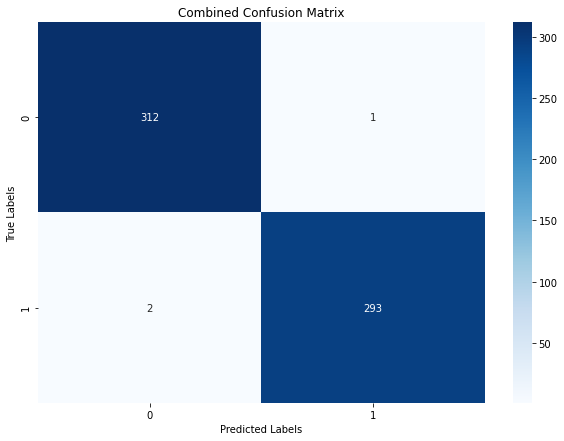

In [32]:
#XGBoost no HP

model_dir= "../models/lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # xgboost definition
    xgbc = xgb.XGBClassifier(random_state=42)
    #fitting model
    mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
    # save to JSON
    mcl.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_xgboost_nohp.json")
    # prediction output
    pred = mcl.predict(X_test)
    # probability of predicted output
    proba = mcl.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_xgboost_nohp.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/lusc_healthy/true_predicted_label_test_"+str(i)+"_xgboost_nohp.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()


Random State: 10
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 10 - Average Accuracy: 0.9951
Random State 10 - Average Precision: 0.9951
Random State 10 - Average Recall: 0.9951
Random State 10 - Average F1 Score: 0.9951
Random State 10 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


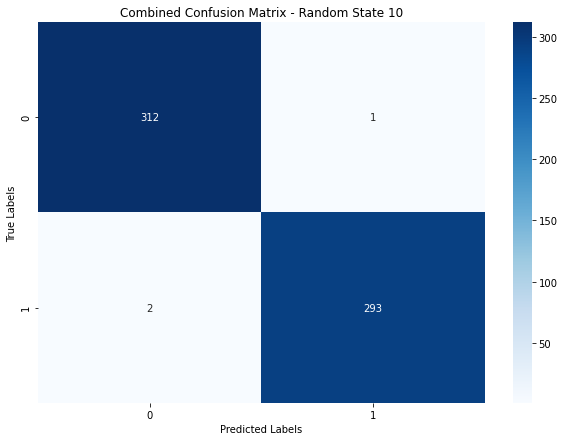

Random State: 20
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 20 - Average Accuracy: 0.9951
Random State 20 - Average Precision: 0.9951
Random State 20 - Average Recall: 0.9951
Random State 20 - Average F1 Score: 0.9951
Random State 20 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


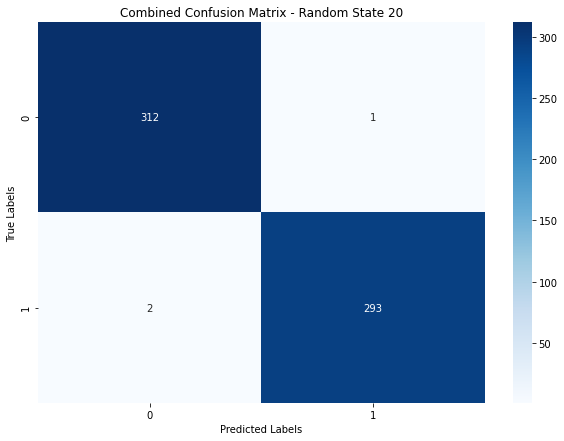

Random State: 30
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 30 - Average Accuracy: 0.9951
Random State 30 - Average Precision: 0.9951
Random State 30 - Average Recall: 0.9951
Random State 30 - Average F1 Score: 0.9951
Random State 30 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


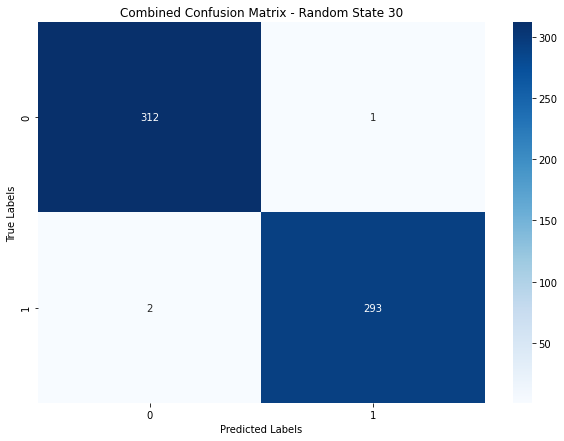

Random State: 40
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 40 - Average Accuracy: 0.9951
Random State 40 - Average Precision: 0.9951
Random State 40 - Average Recall: 0.9951
Random State 40 - Average F1 Score: 0.9951
Random State 40 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


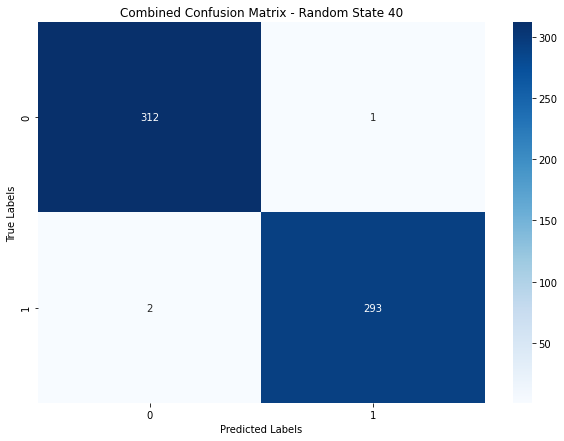

Random State: 50
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 50 - Average Accuracy: 0.9951
Random State 50 - Average Precision: 0.9951
Random State 50 - Average Recall: 0.9951
Random State 50 - Average F1 Score: 0.9951
Random State 50 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


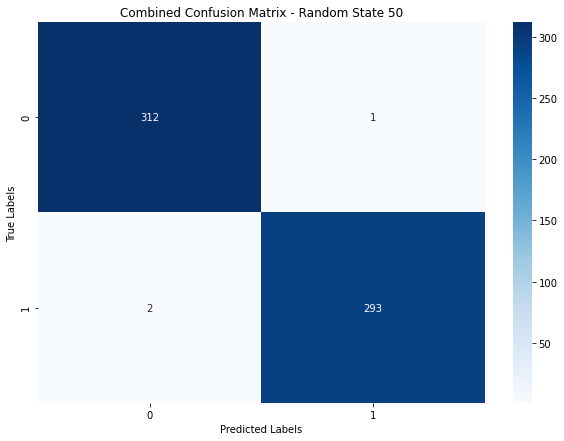

Random State: 60
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 60 - Average Accuracy: 0.9951
Random State 60 - Average Precision: 0.9951
Random State 60 - Average Recall: 0.9951
Random State 60 - Average F1 Score: 0.9951
Random State 60 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


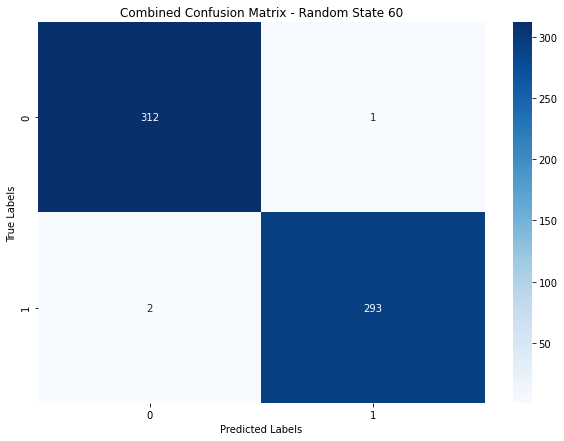

Random State: 70
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 70 - Average Accuracy: 0.9951
Random State 70 - Average Precision: 0.9951
Random State 70 - Average Recall: 0.9951
Random State 70 - Average F1 Score: 0.9951
Random State 70 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


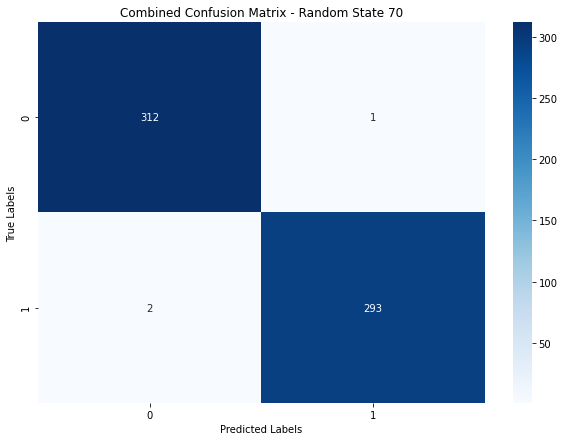

Random State: 80
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 80 - Average Accuracy: 0.9951
Random State 80 - Average Precision: 0.9951
Random State 80 - Average Recall: 0.9951
Random State 80 - Average F1 Score: 0.9951
Random State 80 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


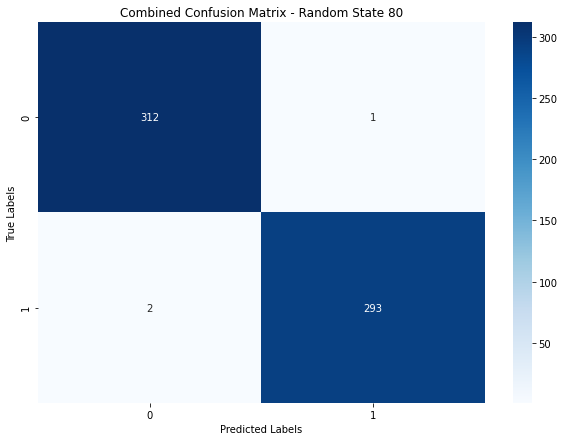

Random State: 90
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 90 - Average Accuracy: 0.9951
Random State 90 - Average Precision: 0.9951
Random State 90 - Average Recall: 0.9951
Random State 90 - Average F1 Score: 0.9951
Random State 90 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


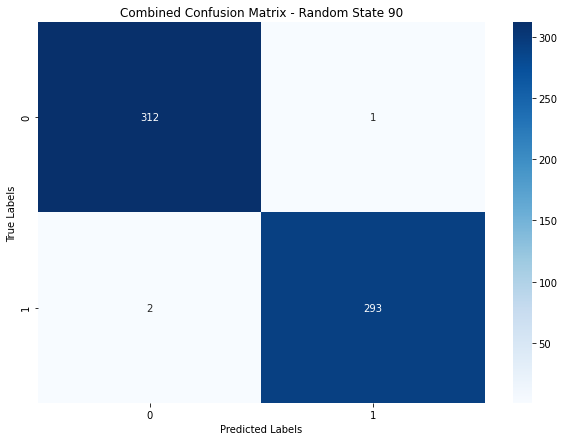

Random State: 100
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Random State 100 - Average Accuracy: 0.9951
Random State 100 - Average Precision: 0.9951
Random State 100 - Average Recall: 0.9951
Random State 100 - Average F1 Score: 0.9951
Random State 100 - Combined Confusion Matrix:
[[312   1]
 [  2 293]]


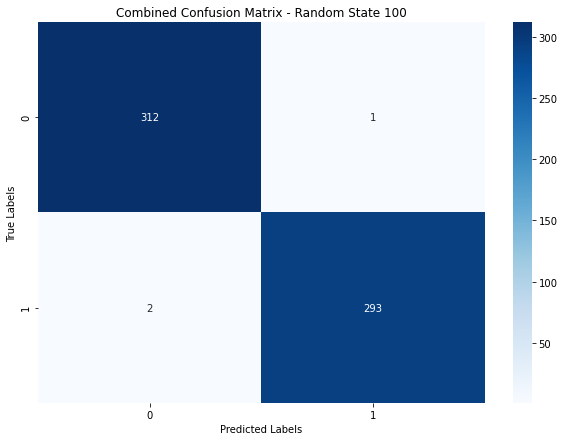

In [56]:
# inclusion of many random states; xgboost; no hp

model_dir = "../models/lusc_healthy/"

# Lists to store the scores for each random state
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for random_state in random_states:
    print(f"Random State: {random_state}")

    # Lists to store the scores for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Lists to accumulate true and predicted labels for all folds
    all_true_labels = []
    all_pred_labels = []

    for i in range(1, 6):
        newdftrain = pd.read_csv("../Data/lusc_healthy/train_split_" + str(i) + ".csv")
        newdftrain.index = newdftrain["Sample"]
        newdftest = pd.read_csv("../Data/lusc_healthy/test_split_" + str(i) + ".csv")
        newdftest.index = newdftest["Sample"]
        X_train, y_train = newdftrain.iloc[:, 0:19648], newdftrain['label'].values
        X_test, y_test = newdftest.iloc[:, 0:19648], newdftest['label'].values
        print(X_train.shape, y_train.shape)
        print(X_test.shape, y_test.shape)

        # XGBoost definition with varying random state
        xgbc = xgb.XGBClassifier(random_state=random_state)
        # Fitting model
        mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
        # Save to JSON
        mcl.save_model(model_dir + f"fold_" + str(i) + f"_model_topology_xgboost_nohp_random_state_{random_state}.json")
        # Prediction output
        pred = mcl.predict(X_test)
        # Probability of predicted output
        proba = mcl.predict_proba(X_test)

        # Append true and predicted labels
        all_true_labels.extend(y_test)
        all_pred_labels.extend(pred)

        # Calculate metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='weighted')
        recall = recall_score(y_test, pred, average='weighted')
        f1 = f1_score(y_test, pred, average='weighted')

        # Append scores to the lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print scores for the current fold
        print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        # Store labels for results
        y_map = pd.DataFrame(data=y_test, columns=['class'])
        y_map['pred'] = pred
        y_map['true_label'] = y_map['class'].map({'lusc': 1, 'healthy': 0})
        y_map['pred_label'] = y_map['pred'].map({'lusc': 1, 'healthy': 0})
        y_map.index = X_test.index

        # Adding true and predicted label to X_test
        X_test['true_label'] = y_map['true_label']
        X_test['predicted_label'] = y_map['pred_label']

        # Drop false predictions
        X_test = drop_false_pred(X_test)
        X_test.to_csv(f"../Output/lusc_healthy/AfterDroppingFalsePrediction_test_{i}_xgboost_nohp_random_state_{random_state}.csv")

        # New y_map
        y_map_new = y_map[y_map.index.isin(X_test.index.tolist())]
        y_map_new.to_csv(f"../Output/lusc_healthy/true_predicted_label_test_{i}_xgboost_nohp_random_state_{random_state}.csv")

    # Calculate average scores
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print average scores
    print(f"Random State {random_state} - Average Accuracy: {avg_accuracy:.4f}")
    print(f"Random State {random_state} - Average Precision: {avg_precision:.4f}")
    print(f"Random State {random_state} - Average Recall: {avg_recall:.4f}")
    print(f"Random State {random_state} - Average F1 Score: {avg_f1:.4f}")

    # Calculate combined confusion matrix
    combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
    print(f"Random State {random_state} - Combined Confusion Matrix:")
    print(combined_cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Combined Confusion Matrix - Random State {random_state}')
    plt.show()

(486, 19648) (486,)
(122, 19648) (122,)
Fold 1 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)
Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)
Fold 3 - Accuracy: 0.9836, Precision: 0.9841, Recall: 0.9836, F1 Score: 0.9836
(487, 19648) (487,)
(121, 19648) (121,)
Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(487, 19648) (487,)
(121, 19648) (121,)
Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Average Accuracy: 0.9951
Average Precision: 0.9952
Average Recall: 0.9951
Average F1 Score: 0.9951
Combined Confusion Matrix:
[[313   0]
 [  3 292]]


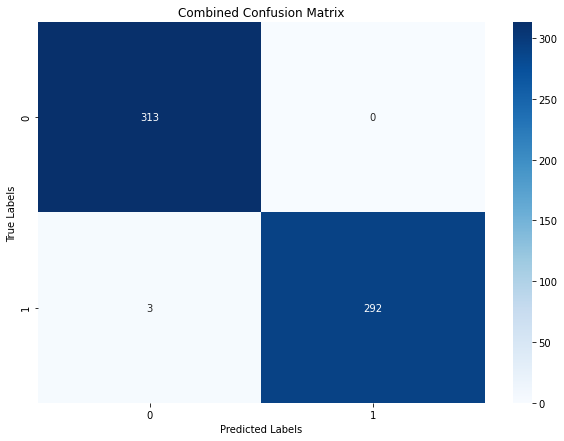

In [33]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# RF

model_dir= "../models/lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Random Forest definition
    rf = RandomForestClassifier()
    # fitting model
    rf.fit(X_train, y_train)

    # Save the model
    joblib.dump(rf, model_dir + f"fold_" + str(i) + "_model_topology_rf.pkl")
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")
    # prediction output
    pred = rf.predict(X_test)
    # probability of predicted output
    proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_rf.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/lusc_healthy/true_predicted_label_test_"+str(i)+"_rf.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(486, 19648) (486,)
(122, 19648) (122,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 1 - Accuracy: 0.5164, Precision: 0.2667, Recall: 0.5164, F1 Score: 0.3517
(486, 19648) (486,)
(122, 19648) (122,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 2 - Accuracy: 0.5164, Precision: 0.2667, Recall: 0.5164, F1 Score: 0.3517
(486, 19648) (486,)
(122, 19648) (122,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 3 - Accuracy: 0.5164, Precision: 0.2667, Recall: 0.5164, F1 Score: 0.3517
(487, 19648) (487,)
(121, 19648) (121,)
Fold 4 - Accuracy: 0.7769, Precision: 0.8469, Recall: 0.7769, F1 Score: 0.7666
(487, 19648) (487,)
(121, 19648) (121,)


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Fold 5 - Accuracy: 0.5124, Precision: 0.2626, Recall: 0.5124, F1 Score: 0.3472
Average Accuracy: 0.5677
Average Precision: 0.3819
Average Recall: 0.5677
Average F1 Score: 0.4338
Combined Confusion Matrix:
[[286  27]
 [236  59]]


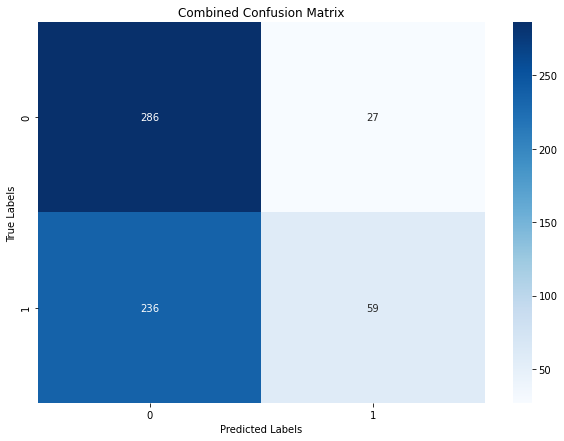

In [34]:
from sklearn.svm import SVC


model_dir= "../models/lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # SVM definition with default hyperparameters
    svm = SVC(probability=True, random_state=42)
    # fitting model
    svm.fit(X_train, y_train)
    
    # prediction output
    pred = svm.predict(X_test)

    # Save the model
    joblib.dump(svm, model_dir + f"fold_" + str(i) + "_model_topology_svm.pkl")
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_svm.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/lusc_healthy/true_predicted_label_test_"+str(i)+"_svm.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(486, 19648) (486,)
(122, 19648) (122,)
Fold 1 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(486, 19648) (486,)
(122, 19648) (122,)
Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
(486, 19648) (486,)
(122, 19648) (122,)
Fold 3 - Accuracy: 0.9918, Precision: 0.9919, Recall: 0.9918, F1 Score: 0.9918
(487, 19648) (487,)
(121, 19648) (121,)
Fold 4 - Accuracy: 0.9835, Precision: 0.9835, Recall: 0.9835, F1 Score: 0.9835
(487, 19648) (487,)
(121, 19648) (121,)
Fold 5 - Accuracy: 0.9917, Precision: 0.9919, Recall: 0.9917, F1 Score: 0.9917
Average Accuracy: 0.9918
Average Precision: 0.9918
Average Recall: 0.9918
Average F1 Score: 0.9918
Combined Confusion Matrix:
[[311   2]
 [  3 292]]


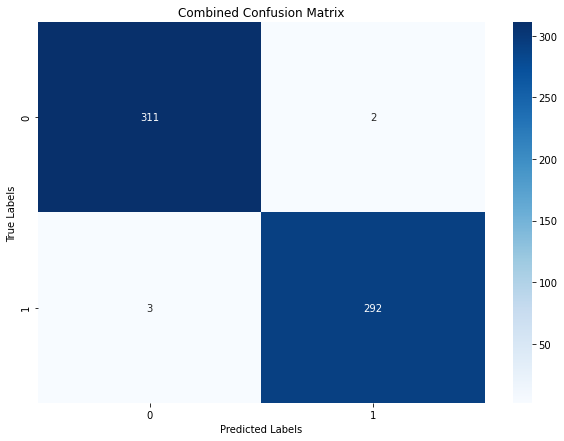

In [35]:
from sklearn.linear_model import LogisticRegression

model_dir= "../models/lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Logistic Regression definition with default hyperparameters
    lr = LogisticRegression(random_state=42)
    # fitting model
    lr.fit(X_train, y_train)
    
    # Save the model
    joblib.dump(lr, model_dir + f"fold_" + str(i) + "_model_topology_lr.pkl")
    
    # prediction output
    pred = lr.predict(X_test)
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_lr.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/lusc_healthy/true_predicted_label_test_"+str(i)+"_lr.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

(486, 19648) (486,)
(122, 19648) (122,)
Fold 1 - Accuracy: 0.6557, Precision: 0.7989, Recall: 0.6557, F1 Score: 0.6149
(486, 19648) (486,)
(122, 19648) (122,)
Fold 2 - Accuracy: 0.6639, Precision: 0.8017, Recall: 0.6639, F1 Score: 0.6262
(486, 19648) (486,)
(122, 19648) (122,)
Fold 3 - Accuracy: 0.6967, Precision: 0.8136, Recall: 0.6967, F1 Score: 0.6699
(487, 19648) (487,)
(121, 19648) (121,)
Fold 4 - Accuracy: 0.9669, Precision: 0.9675, Recall: 0.9669, F1 Score: 0.9669
(487, 19648) (487,)
(121, 19648) (121,)
Fold 5 - Accuracy: 0.7107, Precision: 0.8184, Recall: 0.7107, F1 Score: 0.6870
Average Accuracy: 0.7388
Average Precision: 0.8400
Average Recall: 0.7388
Average F1 Score: 0.7130
Combined Confusion Matrix:
[[155 158]
 [  1 294]]


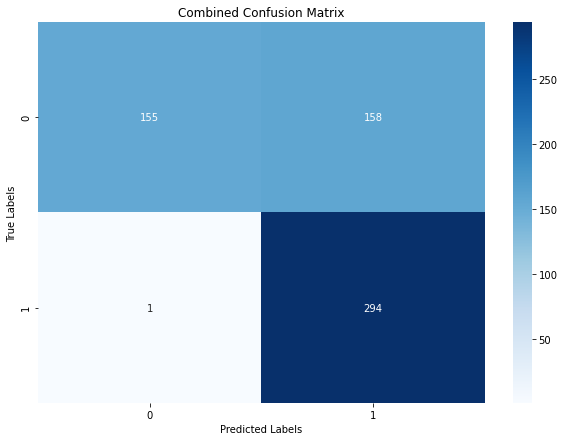

In [36]:
from sklearn.naive_bayes import GaussianNB

model_dir= "../models/lusc_healthy/"

# Lists to store the scores for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Lists to accumulate true and predicted labels for all folds
all_true_labels = []
all_pred_labels = []

for i in range(1,6):
    newdftrain= pd.read_csv("../Data/lusc_healthy/train_split_"+str(i)+".csv")
    newdftrain.index= newdftrain["Sample"]
#     newdftrain=newdftrain.drop(["Sample"], axis="columns")
    newdftest= pd.read_csv("../Data/lusc_healthy/test_split_"+str(i)+".csv")
    newdftest.index= newdftest["Sample"]
#     newdftest=newdftest.drop(["Unnamed: 0"], axis="columns")
    X_train, y_train= newdftrain.iloc[:, 0:19648], newdftrain['label'].values 
    X_test, y_test= newdftest.iloc[:, 0:19648], newdftest['label'].values 
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
                           
    # Naive Bayes definition with default hyperparameters
    nb = GaussianNB()
    # fitting model
    nb.fit(X_train, y_train)
    
    # Save the model
    joblib.dump(nb, model_dir + f"fold_" + str(i) + "_model_topology_nb.pkl")
    
    # prediction output
    pred = nb.predict(X_test)
    
#     rf.save_model(model_dir+f"fold_"+ str(i)+"_model_topology_rf.json")

#     # probability of predicted output
#     proba = rf.predict_proba(X_test)
    
    # Append true and predicted labels
    all_true_labels.extend(y_test)
    all_pred_labels.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    # Append scores to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print scores for the current fold
    print(f"Fold {i} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


                           
    #store labels for results
    y_map = pd.DataFrame(data=y_test, columns=['class'])
    y_map['pred']= pred
    y_map['true_label'] = y_map['class'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map['pred_label'] = y_map['pred'].map({'healthy': 0,'luad': 1,'lusc':2})
    y_map.index= X_test.index
    #y_map.to_csv("../Output/true_predicted_label_test_"+str(i)+".csv")
    
    # adding true and predicted label to X_test
    X_test['true_label']= y_map['true_label']
    X_test['predicted_label']= y_map['pred_label']
    
    # drop false prediction
    X_test=drop_false_pred(X_test)
    X_test.to_csv("../Output/lusc_healthy/AfterDroppingFalsePrediction_test_"+str(i)+"_nb.csv")
    
    # new y_map
    y_map_new= y_map[y_map.index.isin(X_test.index.tolist())]
    y_map_new.to_csv("../Output/lusc_healthy/true_predicted_label_test_"+str(i)+"_nb.csv")

    
# Calculate average scores
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print average scores
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")  

# Calculate combined confusion matrix
combined_cm = confusion_matrix(all_true_labels, all_pred_labels)
print("Combined Confusion Matrix:")
print(combined_cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()